In [17]:

# importing of modules for LeNet CNN
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model


# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

print('Libraries imported.')


Libraries imported.


In [2]:
#training constants
BATCH_SIZE = 32
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
DATASET_FILE_PATH = "./Datasets/iCubWorld/"

print('Main variables initialised.')



Main variables initialised.


In [3]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [4]:
def load_dataset(batch_size=BATCH_SIZE):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)



    train_generator = train_datagen.flow_from_directory(
        DATASET_FILE_PATH+'train',
        target_size=(160, 160),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        DATASET_FILE_PATH+'train',
        target_size=(160, 160),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    test_generator = test_datagen.flow_from_directory(
        DATASET_FILE_PATH+'test',
        target_size=(160, 160),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, validation_generator, test_generator



# #load dataset
# (input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
# print('input_X_train shape:', input_X_train.shape)
# print(input_X_train.shape[0], 'train samples')
# print(input_X_test.shape[0], 'test samples')
 
# # convert to categorical
# output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
# output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# # float and normalization
# input_X_train = input_X_train.astype('float32')
# input_X_test = input_X_test.astype('float32')
# input_X_train /= 255
# input_X_test /= 255


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2024-04-25 19:05:04.316029: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-04-25 19:05:04.316059: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-25 19:05:04.316066: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-25 19:05:04.316173: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-25 19:05:04.316216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
train_generator, validation_generator, test_generator = load_dataset()
print(type(train_generator))


history = model.fit(
    train_generator,
    epochs=25  
)



Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
Epoch 1/25


2024-04-25 19:05:08.598797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - 16s 91ms/step - loss: 2.1095 - accuracy: 0.2234
Epoch 2/25
151/151 [==============================] - 11s 75ms/step - loss: 1.5533 - accuracy: 0.4273
Epoch 3/25
151/151 [==============================] - 11s 75ms/step - loss: 1.2003 - accuracy: 0.5591
Epoch 4/25
151/151 [==============================] - 11s 75ms/step - loss: 1.0768 - accuracy: 0.6191
Epoch 5/25
151/151 [==============================] - 11s 75ms/step - loss: 0.9627 - accuracy: 0.6606
Epoch 6/25
151/151 [==============================] - 11s 75ms/step - loss: 0.9385 - accuracy: 0.6797
Epoch 7/25
151/151 [==============================] - 11s 75ms/step - loss: 0.8737 - accuracy: 0.7116
Epoch 8/25
151/151 [==============================] - 11s 75ms/step - loss: 0.8975 - accuracy: 0.7114
Epoch 9/25
151/151 [==============================] - 11s 75ms/step - loss: 0.8081 - accuracy: 0.7455
Epoch 10/25
151/151 [==============================] - 11s 75ms/step - loss: 1.1704 - accurac

KeyError: 'val_accuracy'

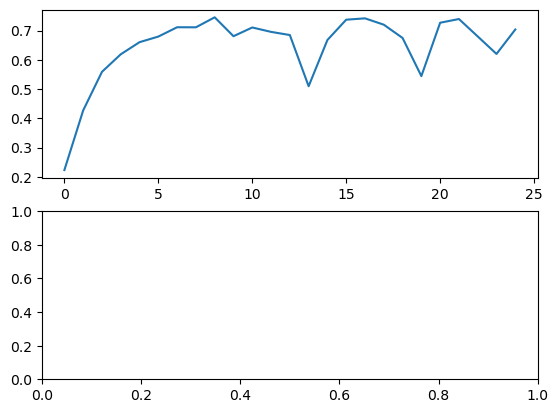

In [7]:
plot_history(history)

# Experiment 1: Effect of epoch number

In [ ]:
# number of layers, number of epochs, batch size, optimizer, drop out rate, number of neurons in dense layer, kernel size, number of kernels

In [97]:
train_generator, validation_generator, test_generator = load_dataset()

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.


In [98]:
logger = keras.callbacks.CSVLogger('tmp/epoch_expt/training_logs.csv', append=True)
hitory = model.fit( 
    train_generator,
    epochs=150,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=[logger]
)

Epoch 1/150
151/151 [==============================] - 21s 124ms/step - loss: 2.0254 - accuracy: 0.2401 - val_loss: 1.9533 - val_accuracy: 0.2442
Epoch 2/150
151/151 [==============================] - 17s 112ms/step - loss: 1.5077 - accuracy: 0.4317 - val_loss: 1.7114 - val_accuracy: 0.3325
Epoch 3/150
151/151 [==============================] - 16s 106ms/step - loss: 1.2004 - accuracy: 0.5544 - val_loss: 1.2540 - val_accuracy: 0.5383
Epoch 4/150
151/151 [==============================] - 17s 112ms/step - loss: 1.0092 - accuracy: 0.6272 - val_loss: 1.1569 - val_accuracy: 0.5967
Epoch 5/150
151/151 [==============================] - 17s 113ms/step - loss: 0.8665 - accuracy: 0.6822 - val_loss: 1.0168 - val_accuracy: 0.6367
Epoch 6/150
151/151 [==============================] - 16s 107ms/step - loss: 1.4938 - accuracy: 0.4777 - val_loss: 1.5604 - val_accuracy: 0.4450
Epoch 7/150
151/151 [==============================] - 16s 103ms/step - loss: 1.1444 - accuracy: 0.5923 - val_loss: 1.4562 -

In [99]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


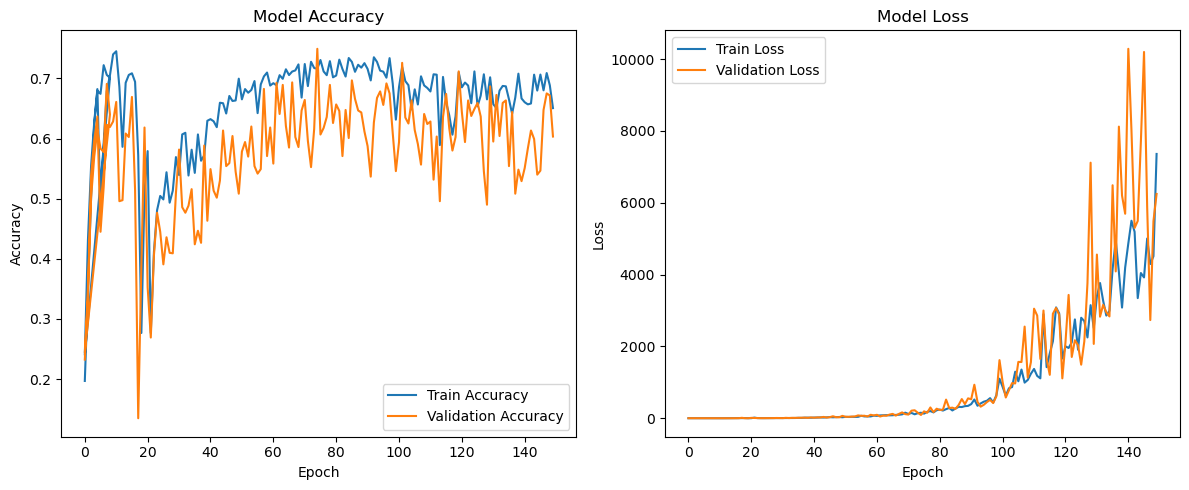

In [100]:
df = pd.read_csv('tmp/epoch_expt/training_logs.csv')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(df['epoch'], df['accuracy'], label='Train Accuracy')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)  
plt.plot(df['epoch'], df['loss'], label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [123]:
train_generator, validation_generator, test_generator = load_dataset()

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    keras.layers.BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    keras.layers.BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    keras.layers.BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.


In [124]:
logger = keras.callbacks.CSVLogger('tmp/epoch_expt/training_logs_nw_model.csv', append=True)
hitory = model.fit( 
    train_generator,
    epochs=150,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=[logger]
)

Epoch 1/150
151/151 [==============================] - 23s 131ms/step - loss: 5.6130 - accuracy: 0.3865 - val_loss: 13.7336 - val_accuracy: 0.0833
Epoch 2/150
151/151 [==============================] - 17s 115ms/step - loss: 4.6914 - accuracy: 0.5127 - val_loss: 27.2373 - val_accuracy: 0.1817
Epoch 3/150
151/151 [==============================] - 18s 117ms/step - loss: 3.8475 - accuracy: 0.6002 - val_loss: 17.2590 - val_accuracy: 0.2533
Epoch 4/150
151/151 [==============================] - 17s 114ms/step - loss: 3.6186 - accuracy: 0.6516 - val_loss: 11.8881 - val_accuracy: 0.4158
Epoch 5/150
151/151 [==============================] - 18s 117ms/step - loss: 2.9233 - accuracy: 0.7043 - val_loss: 48.7030 - val_accuracy: 0.2075
Epoch 6/150
151/151 [==============================] - 17s 110ms/step - loss: 2.9810 - accuracy: 0.7322 - val_loss: 3.1516 - val_accuracy: 0.7075
Epoch 7/150
151/151 [==============================] - 17s 110ms/step - loss: 2.7564 - accuracy: 0.7645 - val_loss: 13.

KeyboardInterrupt: 

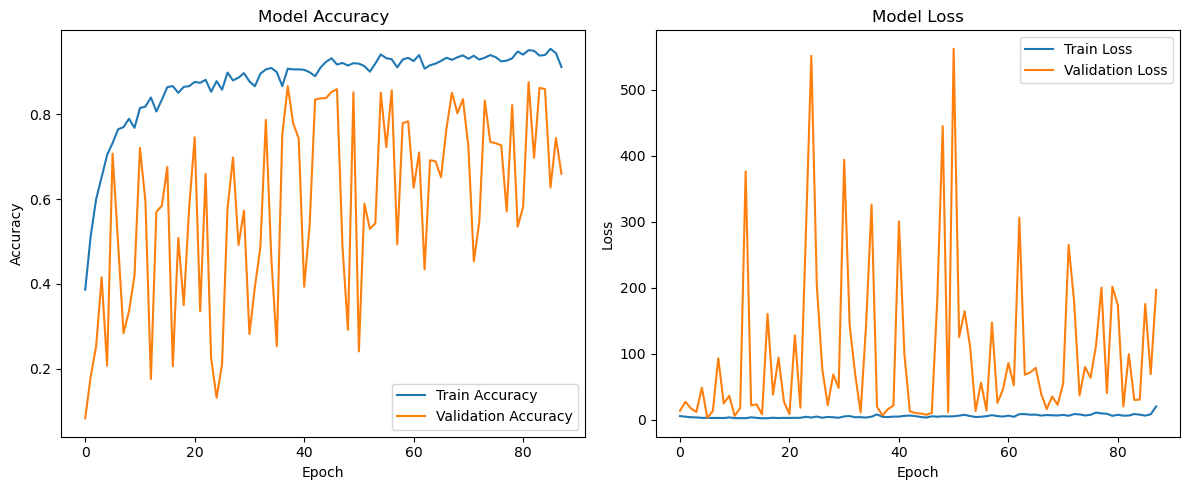

In [125]:
df = pd.read_csv('tmp/epoch_expt/training_logs_nw_model.csv')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(df['epoch'], df['accuracy'], label='Train Accuracy')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)  
plt.plot(df['epoch'], df['loss'], label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# logger = keras.callbacks.CSVLogger('tmp/epoch_expt/training_logs_nw_model.csv', append=True)
epoch_vals = [1,5,10,15,25,50,60]
test_acc_for_epoch = []
train_acc_for_epoch = []
test_loss_for_epoch=[]
train_loss_for_epoch = []
for epoch in epoch_vals:
    history = model.fit( 
        train_generator,
        epochs=epoch,
        batch_size = BATCH_SIZE, 
    )
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    test_acc_for_epoch.append(test_accuracy)
    test_loss_for_epoch.append(test_loss)
    train_acc_for_epoch.append(history.history['accuracy'])
    train_loss_for_epoch.append(history.history['loss'])
    
    
    
    

129/129 [==============================] - 6s 45ms/step - loss: 210.0034 - accuracy: 0.4920
Epoch 1/5
151/151 [==============================] - 11s 74ms/step - loss: 7.7019 - accuracy: 0.6762
Epoch 2/5
151/151 [==============================] - 11s 74ms/step - loss: 8.9405 - accuracy: 0.6587
Epoch 3/5
151/151 [==============================] - 11s 74ms/step - loss: 9.4556 - accuracy: 0.7066
Epoch 4/5
151/151 [==============================] - 11s 74ms/step - loss: 15.7735 - accuracy: 0.6637
Epoch 5/5
129/129 [==============================] - 5s 41ms/step - loss: 1154.1682 - accuracy: 0.4280
Epoch 1/10
151/151 [==============================] - 12s 76ms/step - loss: 26.4113 - accuracy: 0.6585
Epoch 2/10
151/151 [==============================] - 11s 75ms/step - loss: 24.5037 - accuracy: 0.7137
Epoch 3/10
151/151 [==============================] - 11s 74ms/step - loss: 34.3168 - accuracy: 0.6435
Epoch 4/10
151/151 [==============================] - 11s 74ms/step - loss: 17.7667 - accur

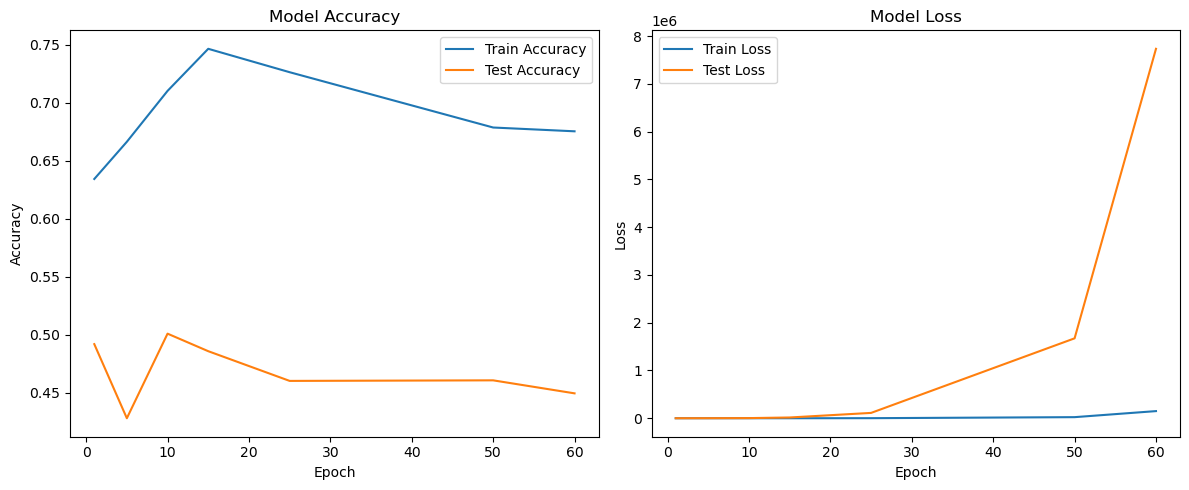

In [14]:

# train_acc_for_epoch_final = [ np.array(i).flatten() for i in train_acc_for_epoch]
# train_loss_for_epoch_final = [np.array(i).flatten() for i in train_loss_for_epoch]




# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)  
# plt.plot(epoch_vals, train_acc_for_epoch_final, label='Train Accuracy')
# plt.plot(epoch_vals, test_acc_for_epoch, label='Test Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()


# plt.subplot(1, 2, 2)  
# plt.plot(epoch_vals, train_loss_for_epoch_final, label='Train Loss')
# plt.plot(epoch_vals, test_loss_for_epoch, label='Test Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()



train_acc_for_epoch_final = [np.mean(np.array(i)) for i in train_acc_for_epoch]
train_loss_for_epoch_final = [np.mean(np.array(i)) for i in train_loss_for_epoch]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(epoch_vals, train_acc_for_epoch_final, label='Train Accuracy')
plt.plot(epoch_vals, test_acc_for_epoch, label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)  
plt.plot(epoch_vals, train_loss_for_epoch_final, label='Train Loss')
plt.plot(epoch_vals, test_loss_for_epoch, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [102]:
logger = keras.callbacks.CSVLogger('tmp/epoch_expt/training_w_es_logs.csv', append=True)
model_callbacks = [logger, keras.callbacks.EarlyStopping(patience=3)]

history_with_callback = model.fit(
    train_generator, 
    epochs = 150, 
    batch_size = BATCH_SIZE,
    validation_data = validation_generator,
    callbacks=model_callbacks)

Epoch 1/150
151/151 [==============================] - 17s 109ms/step - loss: 5641.6558 - accuracy: 0.6776 - val_loss: 7574.7573 - val_accuracy: 0.5808
Epoch 2/150
151/151 [==============================] - 16s 109ms/step - loss: 7420.8638 - accuracy: 0.6399 - val_loss: 10298.1934 - val_accuracy: 0.5725
Epoch 3/150
151/151 [==============================] - 16s 106ms/step - loss: 7182.0835 - accuracy: 0.6587 - val_loss: 5808.8223 - val_accuracy: 0.6300
Epoch 4/150
151/151 [==============================] - 16s 103ms/step - loss: 6074.6641 - accuracy: 0.7047 - val_loss: 6429.4321 - val_accuracy: 0.6192
Epoch 5/150
151/151 [==============================] - 16s 108ms/step - loss: 6185.4600 - accuracy: 0.6822 - val_loss: 3395.1929 - val_accuracy: 0.6933
Epoch 6/150
151/151 [==============================] - 16s 108ms/step - loss: 6060.8530 - accuracy: 0.6868 - val_loss: 8151.5908 - val_accuracy: 0.5433
Epoch 7/150
151/151 [==============================] - 16s 108ms/step - loss: 7514.4414

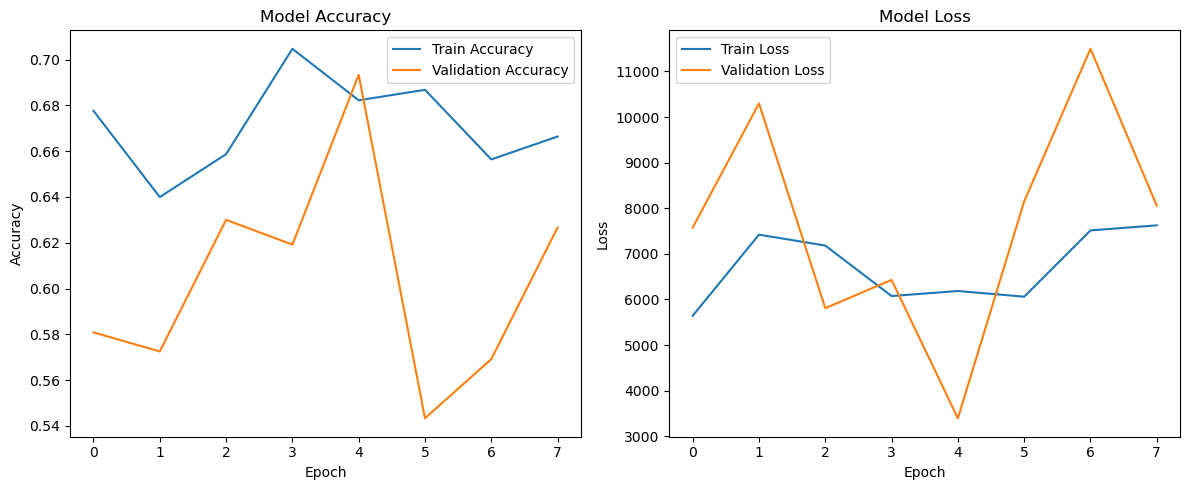

In [104]:
df = pd.read_csv('tmp/epoch_expt/training_w_es_logs.csv')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(df['epoch'], df['accuracy'], label='Train Accuracy')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)  
plt.plot(df['epoch'], df['loss'], label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Experiment 2: Effect of drop out rate

In [106]:
train_generator, validation_generator, test_generator = load_dataset()
print(type(train_generator))

Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [107]:
def create_callbacks(model_name,patience=5):
    model_callbacks = [
        keras.callbacks.EarlyStopping(patience=patience),
        keras.callbacks.ModelCheckpoint(filepath='tmp/expt1'+model_name, 
                                        save_best_only=True, 
                                        monitor='val_accuracy',
                                        mode='max')
    ]
    return model_callbacks
    

drop_out_vals = [x/100 for x in range(20,60,5)]
print(drop_out_vals)


def get_model(dropout):

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout),
        Dense(10, activation='softmax') 
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]


In [109]:
for i in drop_out_vals: 
    model = get_model(i)
    c_b = create_callbacks(str(int(i*100)))
    model.fit( 
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=c_b
)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.0866 - accuracy: 0.2137INFO:tensorflow:Assets written to: tmp/expt120/assets


INFO:tensorflow:Assets written to: tmp/expt120/assets


151/151 [==============================] - 22s 129ms/step - loss: 2.0866 - accuracy: 0.2137 - val_loss: 1.9427 - val_accuracy: 0.2425
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.6859 - accuracy: 0.3825INFO:tensorflow:Assets written to: tmp/expt120/assets


INFO:tensorflow:Assets written to: tmp/expt120/assets


151/151 [==============================] - 17s 111ms/step - loss: 1.6859 - accuracy: 0.3825 - val_loss: 1.5942 - val_accuracy: 0.3867
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.3273 - accuracy: 0.5065INFO:tensorflow:Assets written to: tmp/expt120/assets


INFO:tensorflow:Assets written to: tmp/expt120/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.3273 - accuracy: 0.5065 - val_loss: 1.6033 - val_accuracy: 0.3892
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.2241 - accuracy: 0.5671INFO:tensorflow:Assets written to: tmp/expt120/assets


INFO:tensorflow:Assets written to: tmp/expt120/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.2241 - accuracy: 0.5671 - val_loss: 1.2835 - val_accuracy: 0.5700
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 1.0772 - accuracy: 0.6266INFO:tensorflow:Assets written to: tmp/expt120/assets


INFO:tensorflow:Assets written to: tmp/expt120/assets


151/151 [==============================] - 17s 112ms/step - loss: 1.0772 - accuracy: 0.6266 - val_loss: 1.2622 - val_accuracy: 0.5775
Epoch 6/100
151/151 [==============================] - 17s 110ms/step - loss: 1.0804 - accuracy: 0.6483 - val_loss: 1.4129 - val_accuracy: 0.5483
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 1.0222 - accuracy: 0.6562INFO:tensorflow:Assets written to: tmp/expt120/assets


INFO:tensorflow:Assets written to: tmp/expt120/assets


151/151 [==============================] - 17s 112ms/step - loss: 1.0222 - accuracy: 0.6562 - val_loss: 1.2754 - val_accuracy: 0.5825
Epoch 8/100
151/151 [==============================] - 16s 105ms/step - loss: 1.3179 - accuracy: 0.6214 - val_loss: 1.6423 - val_accuracy: 0.5483
Epoch 9/100
151/151 [==============================] - 16s 107ms/step - loss: 1.5623 - accuracy: 0.6106 - val_loss: 1.8687 - val_accuracy: 0.4867
Epoch 10/100
151/151 [==============================] - 16s 107ms/step - loss: 3.2270 - accuracy: 0.4731 - val_loss: 4.2011 - val_accuracy: 0.3900
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.0015 - accuracy: 0.2505INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 21s 125ms/step - loss: 2.0015 - accuracy: 0.2505 - val_loss: 1.6329 - val_accuracy: 0.4067
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.4702 - accuracy: 0.4540INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 109ms/step - loss: 1.4702 - accuracy: 0.4540 - val_loss: 1.4432 - val_accuracy: 0.4417
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.1574 - accuracy: 0.5633INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 111ms/step - loss: 1.1574 - accuracy: 0.5633 - val_loss: 1.1520 - val_accuracy: 0.5650
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.0027 - accuracy: 0.6283INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.0027 - accuracy: 0.6283 - val_loss: 1.0084 - val_accuracy: 0.6200
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 0.8212 - accuracy: 0.7005INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 113ms/step - loss: 0.8212 - accuracy: 0.7005 - val_loss: 1.0086 - val_accuracy: 0.6333
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 0.7110 - accuracy: 0.7389INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 114ms/step - loss: 0.7110 - accuracy: 0.7389 - val_loss: 0.8549 - val_accuracy: 0.6733
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.7611INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 114ms/step - loss: 0.6752 - accuracy: 0.7611 - val_loss: 0.7251 - val_accuracy: 0.7317
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.7736INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 17s 112ms/step - loss: 0.6566 - accuracy: 0.7736 - val_loss: 0.7047 - val_accuracy: 0.7592
Epoch 9/100
151/151 [==============================] - 16s 107ms/step - loss: 0.6278 - accuracy: 0.7795 - val_loss: 0.7944 - val_accuracy: 0.7408
Epoch 10/100
151/151 [==============================] - 16s 107ms/step - loss: 0.5781 - accuracy: 0.7993 - val_loss: 0.7662 - val_accuracy: 0.7475
Epoch 11/100
151/151 [==============================] - 16s 108ms/step - loss: 0.8165 - accuracy: 0.7505 - val_loss: 0.7149 - val_accuracy: 0.7558
Epoch 12/100
151/151 [==============================] - 16s 106ms/step - loss: 0.5719 - accuracy: 0.8042 - val_loss: 0.8052 - val_accuracy: 0.7433
Epoch 13/100
151/151 [==============================] - ETA: 0s - loss: 0.6223 - accuracy: 0.8055INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 16s 107ms/step - loss: 0.6223 - accuracy: 0.8055 - val_loss: 0.5906 - val_accuracy: 0.8058
Epoch 14/100
151/151 [==============================] - 16s 105ms/step - loss: 0.6660 - accuracy: 0.8015 - val_loss: 1.0576 - val_accuracy: 0.6908
Epoch 15/100
151/151 [==============================] - 15s 101ms/step - loss: 0.5879 - accuracy: 0.8205 - val_loss: 0.7660 - val_accuracy: 0.8008
Epoch 16/100
151/151 [==============================] - ETA: 0s - loss: 0.5802 - accuracy: 0.8292INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 16s 107ms/step - loss: 0.5802 - accuracy: 0.8292 - val_loss: 0.8101 - val_accuracy: 0.8200
Epoch 17/100
151/151 [==============================] - 16s 104ms/step - loss: 0.8493 - accuracy: 0.7949 - val_loss: 0.6498 - val_accuracy: 0.7992
Epoch 18/100
151/151 [==============================] - ETA: 0s - loss: 0.5652 - accuracy: 0.8394INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 16s 108ms/step - loss: 0.5652 - accuracy: 0.8394 - val_loss: 0.5295 - val_accuracy: 0.8417
Epoch 19/100
151/151 [==============================] - 16s 107ms/step - loss: 0.9644 - accuracy: 0.7905 - val_loss: 2.4586 - val_accuracy: 0.6567
Epoch 20/100
151/151 [==============================] - ETA: 0s - loss: 0.7552 - accuracy: 0.8195INFO:tensorflow:Assets written to: tmp/expt125/assets


INFO:tensorflow:Assets written to: tmp/expt125/assets


151/151 [==============================] - 16s 106ms/step - loss: 0.7552 - accuracy: 0.8195 - val_loss: 0.4760 - val_accuracy: 0.8425
Epoch 21/100
151/151 [==============================] - 16s 105ms/step - loss: 0.7803 - accuracy: 0.8184 - val_loss: 1.2946 - val_accuracy: 0.7050
Epoch 22/100
151/151 [==============================] - 16s 103ms/step - loss: 0.7379 - accuracy: 0.8336 - val_loss: 2.1411 - val_accuracy: 0.6783
Epoch 23/100
151/151 [==============================] - 16s 102ms/step - loss: 0.9221 - accuracy: 0.8038 - val_loss: 1.0008 - val_accuracy: 0.7475
Epoch 24/100
151/151 [==============================] - 16s 104ms/step - loss: 1.3469 - accuracy: 0.7832 - val_loss: 1.7017 - val_accuracy: 0.7325
Epoch 25/100
151/151 [==============================] - 16s 105ms/step - loss: 1.1382 - accuracy: 0.8155 - val_loss: 2.0733 - val_accuracy: 0.7775
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.0390 - accuracy: 0.2320INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 22s 130ms/step - loss: 2.0390 - accuracy: 0.2320 - val_loss: 2.0208 - val_accuracy: 0.2625
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.5326 - accuracy: 0.4342INFO:tensorflow:Assets written to: tmp/expt130/assets


INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 17s 114ms/step - loss: 1.5326 - accuracy: 0.4342 - val_loss: 1.3779 - val_accuracy: 0.5192
Epoch 3/100
151/151 [==============================] - 17s 110ms/step - loss: 1.1898 - accuracy: 0.5648 - val_loss: 1.4364 - val_accuracy: 0.4567
Epoch 4/100
151/151 [==============================] - 15s 101ms/step - loss: 1.0065 - accuracy: 0.6364 - val_loss: 1.3132 - val_accuracy: 0.5008
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 0.8263 - accuracy: 0.7010INFO:tensorflow:Assets written to: tmp/expt130/assets


INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 16s 104ms/step - loss: 0.8263 - accuracy: 0.7010 - val_loss: 1.0855 - val_accuracy: 0.5850
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 0.8582 - accuracy: 0.6999INFO:tensorflow:Assets written to: tmp/expt130/assets


INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 16s 108ms/step - loss: 0.8582 - accuracy: 0.6999 - val_loss: 0.8129 - val_accuracy: 0.6708
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.7493INFO:tensorflow:Assets written to: tmp/expt130/assets


INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 17s 110ms/step - loss: 0.7017 - accuracy: 0.7493 - val_loss: 0.7485 - val_accuracy: 0.7325
Epoch 8/100
151/151 [==============================] - 16s 105ms/step - loss: 0.6776 - accuracy: 0.7541 - val_loss: 0.8160 - val_accuracy: 0.6775
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.7763INFO:tensorflow:Assets written to: tmp/expt130/assets


INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 16s 108ms/step - loss: 0.6682 - accuracy: 0.7763 - val_loss: 0.7081 - val_accuracy: 0.7358
Epoch 10/100
151/151 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.7943INFO:tensorflow:Assets written to: tmp/expt130/assets


INFO:tensorflow:Assets written to: tmp/expt130/assets


151/151 [==============================] - 17s 113ms/step - loss: 0.5824 - accuracy: 0.7943 - val_loss: 0.6708 - val_accuracy: 0.7633
Epoch 11/100
151/151 [==============================] - 17s 111ms/step - loss: 1.0703 - accuracy: 0.6664 - val_loss: 1.0036 - val_accuracy: 0.7067
Epoch 12/100
151/151 [==============================] - 16s 109ms/step - loss: 0.6203 - accuracy: 0.7847 - val_loss: 0.8854 - val_accuracy: 0.6725
Epoch 13/100
151/151 [==============================] - 17s 109ms/step - loss: 0.7250 - accuracy: 0.7741 - val_loss: 0.7315 - val_accuracy: 0.7575
Epoch 14/100
151/151 [==============================] - 17s 115ms/step - loss: 0.9982 - accuracy: 0.7461 - val_loss: 0.8611 - val_accuracy: 0.7075
Epoch 15/100
151/151 [==============================] - 17s 114ms/step - loss: 0.6896 - accuracy: 0.7782 - val_loss: 0.8688 - val_accuracy: 0.7400
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.1071 - accuracy: 0.2039INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: tmp/expt135/assets


151/151 [==============================] - 22s 127ms/step - loss: 2.1071 - accuracy: 0.2039 - val_loss: 2.0998 - val_accuracy: 0.2125
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.5807 - accuracy: 0.4217INFO:tensorflow:Assets written to: tmp/expt135/assets


INFO:tensorflow:Assets written to: tmp/expt135/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.5807 - accuracy: 0.4217 - val_loss: 1.4400 - val_accuracy: 0.4300
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.2558 - accuracy: 0.5473INFO:tensorflow:Assets written to: tmp/expt135/assets


INFO:tensorflow:Assets written to: tmp/expt135/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.2558 - accuracy: 0.5473 - val_loss: 1.2306 - val_accuracy: 0.5750
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.0580 - accuracy: 0.6233INFO:tensorflow:Assets written to: tmp/expt135/assets


INFO:tensorflow:Assets written to: tmp/expt135/assets


151/151 [==============================] - 17s 111ms/step - loss: 1.0580 - accuracy: 0.6233 - val_loss: 0.8663 - val_accuracy: 0.6808
Epoch 5/100
151/151 [==============================] - 17s 110ms/step - loss: 0.9455 - accuracy: 0.6601 - val_loss: 1.0041 - val_accuracy: 0.6417
Epoch 6/100
151/151 [==============================] - 17s 115ms/step - loss: 0.7843 - accuracy: 0.7187 - val_loss: 1.2934 - val_accuracy: 0.6583
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.7642 - accuracy: 0.7403INFO:tensorflow:Assets written to: tmp/expt135/assets


INFO:tensorflow:Assets written to: tmp/expt135/assets


151/151 [==============================] - 17s 115ms/step - loss: 0.7642 - accuracy: 0.7403 - val_loss: 0.7934 - val_accuracy: 0.7367
Epoch 8/100
151/151 [==============================] - 17s 111ms/step - loss: 0.7011 - accuracy: 0.7501 - val_loss: 0.8134 - val_accuracy: 0.6917
Epoch 9/100
151/151 [==============================] - 17s 109ms/step - loss: 0.7273 - accuracy: 0.7599 - val_loss: 1.3290 - val_accuracy: 0.6592
Epoch 10/100
151/151 [==============================] - ETA: 0s - loss: 0.6092 - accuracy: 0.7897INFO:tensorflow:Assets written to: tmp/expt135/assets


INFO:tensorflow:Assets written to: tmp/expt135/assets


151/151 [==============================] - 17s 109ms/step - loss: 0.6092 - accuracy: 0.7897 - val_loss: 0.5988 - val_accuracy: 0.8008
Epoch 11/100
151/151 [==============================] - 16s 108ms/step - loss: 0.7770 - accuracy: 0.7545 - val_loss: 0.7344 - val_accuracy: 0.7508
Epoch 12/100
151/151 [==============================] - 16s 107ms/step - loss: 0.6727 - accuracy: 0.7915 - val_loss: 0.6759 - val_accuracy: 0.7700
Epoch 13/100
151/151 [==============================] - 16s 106ms/step - loss: 0.6755 - accuracy: 0.7961 - val_loss: 1.0605 - val_accuracy: 0.6733
Epoch 14/100
151/151 [==============================] - 16s 103ms/step - loss: 0.7000 - accuracy: 0.8028 - val_loss: 0.7198 - val_accuracy: 0.7775
Epoch 15/100
151/151 [==============================] - 16s 104ms/step - loss: 0.8452 - accuracy: 0.7784 - val_loss: 0.6893 - val_accuracy: 0.7908
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.0627 - accuracy: 0.2307INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 21s 125ms/step - loss: 2.0627 - accuracy: 0.2307 - val_loss: 1.9471 - val_accuracy: 0.2992
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.5757 - accuracy: 0.4175INFO:tensorflow:Assets written to: tmp/expt140/assets


INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 16s 108ms/step - loss: 1.5757 - accuracy: 0.4175 - val_loss: 1.4190 - val_accuracy: 0.4475
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.2838 - accuracy: 0.5192INFO:tensorflow:Assets written to: tmp/expt140/assets


INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 17s 112ms/step - loss: 1.2838 - accuracy: 0.5192 - val_loss: 1.2044 - val_accuracy: 0.5858
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.1140 - accuracy: 0.5858INFO:tensorflow:Assets written to: tmp/expt140/assets


INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.1140 - accuracy: 0.5858 - val_loss: 1.1251 - val_accuracy: 0.5958
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 0.9836 - accuracy: 0.6352INFO:tensorflow:Assets written to: tmp/expt140/assets


INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 17s 110ms/step - loss: 0.9836 - accuracy: 0.6352 - val_loss: 0.9149 - val_accuracy: 0.6617
Epoch 6/100
151/151 [==============================] - 16s 109ms/step - loss: 0.8995 - accuracy: 0.6741 - val_loss: 1.1037 - val_accuracy: 0.6092
Epoch 7/100
151/151 [==============================] - 16s 106ms/step - loss: 0.8213 - accuracy: 0.7082 - val_loss: 0.9763 - val_accuracy: 0.6300
Epoch 8/100
151/151 [==============================] - 16s 106ms/step - loss: 0.7874 - accuracy: 0.7237 - val_loss: 1.0353 - val_accuracy: 0.6333
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 0.8086 - accuracy: 0.7224INFO:tensorflow:Assets written to: tmp/expt140/assets


INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 16s 105ms/step - loss: 0.8086 - accuracy: 0.7224 - val_loss: 0.7775 - val_accuracy: 0.7175
Epoch 10/100
151/151 [==============================] - 16s 109ms/step - loss: 0.7281 - accuracy: 0.7516 - val_loss: 1.1063 - val_accuracy: 0.5933
Epoch 11/100
151/151 [==============================] - 16s 108ms/step - loss: 0.7187 - accuracy: 0.7489 - val_loss: 1.7384 - val_accuracy: 0.5608
Epoch 12/100
151/151 [==============================] - 16s 107ms/step - loss: 0.7165 - accuracy: 0.7526 - val_loss: 1.0607 - val_accuracy: 0.6733
Epoch 13/100
151/151 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.7663INFO:tensorflow:Assets written to: tmp/expt140/assets


INFO:tensorflow:Assets written to: tmp/expt140/assets


151/151 [==============================] - 16s 108ms/step - loss: 0.6924 - accuracy: 0.7663 - val_loss: 0.7016 - val_accuracy: 0.7492
Epoch 14/100
151/151 [==============================] - 16s 107ms/step - loss: 0.7748 - accuracy: 0.7578 - val_loss: 1.9462 - val_accuracy: 0.5533
Epoch 15/100
151/151 [==============================] - 17s 109ms/step - loss: 0.9325 - accuracy: 0.7185 - val_loss: 0.7311 - val_accuracy: 0.7258
Epoch 16/100
151/151 [==============================] - 16s 109ms/step - loss: 0.7185 - accuracy: 0.7670 - val_loss: 0.8922 - val_accuracy: 0.7125
Epoch 17/100
151/151 [==============================] - 16s 109ms/step - loss: 1.0005 - accuracy: 0.7214 - val_loss: 0.7998 - val_accuracy: 0.7333
Epoch 18/100
151/151 [==============================] - 17s 110ms/step - loss: 1.1306 - accuracy: 0.7149 - val_loss: 0.8246 - val_accuracy: 0.7308
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 1.9650 - accuracy: 0.2578INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 22s 130ms/step - loss: 1.9650 - accuracy: 0.2578 - val_loss: 1.7310 - val_accuracy: 0.4000
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.4049 - accuracy: 0.4650INFO:tensorflow:Assets written to: tmp/expt145/assets


INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 17s 114ms/step - loss: 1.4049 - accuracy: 0.4650 - val_loss: 1.4139 - val_accuracy: 0.4800
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.5906INFO:tensorflow:Assets written to: tmp/expt145/assets


INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 18s 116ms/step - loss: 1.1208 - accuracy: 0.5906 - val_loss: 1.0329 - val_accuracy: 0.6392
Epoch 4/100
151/151 [==============================] - 17s 111ms/step - loss: 0.9340 - accuracy: 0.6610 - val_loss: 1.1004 - val_accuracy: 0.6000
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 0.8824 - accuracy: 0.6843INFO:tensorflow:Assets written to: tmp/expt145/assets


INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 17s 109ms/step - loss: 0.8824 - accuracy: 0.6843 - val_loss: 0.9761 - val_accuracy: 0.6442
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 0.8023 - accuracy: 0.7264INFO:tensorflow:Assets written to: tmp/expt145/assets


INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 16s 108ms/step - loss: 0.8023 - accuracy: 0.7264 - val_loss: 0.7673 - val_accuracy: 0.7233
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.8955 - accuracy: 0.6964INFO:tensorflow:Assets written to: tmp/expt145/assets


INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 17s 113ms/step - loss: 0.8955 - accuracy: 0.6964 - val_loss: 0.7427 - val_accuracy: 0.7267
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 0.7831 - accuracy: 0.7312INFO:tensorflow:Assets written to: tmp/expt145/assets


INFO:tensorflow:Assets written to: tmp/expt145/assets


151/151 [==============================] - 17s 112ms/step - loss: 0.7831 - accuracy: 0.7312 - val_loss: 0.7612 - val_accuracy: 0.7350
Epoch 9/100
151/151 [==============================] - 17s 111ms/step - loss: 0.9761 - accuracy: 0.6958 - val_loss: 0.7448 - val_accuracy: 0.7108
Epoch 10/100
151/151 [==============================] - 16s 108ms/step - loss: 1.1835 - accuracy: 0.6476 - val_loss: 0.9067 - val_accuracy: 0.7067
Epoch 11/100
151/151 [==============================] - 17s 109ms/step - loss: 0.8586 - accuracy: 0.7468 - val_loss: 0.9730 - val_accuracy: 0.6692
Epoch 12/100
151/151 [==============================] - 16s 108ms/step - loss: 0.7779 - accuracy: 0.7599 - val_loss: 0.9423 - val_accuracy: 0.7092
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.2380 - accuracy: 0.1508INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 22s 131ms/step - loss: 2.2380 - accuracy: 0.1508 - val_loss: 2.0923 - val_accuracy: 0.1908
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.8613 - accuracy: 0.3105INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.8613 - accuracy: 0.3105 - val_loss: 1.8749 - val_accuracy: 0.2800
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.5304 - accuracy: 0.4419INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 16s 108ms/step - loss: 1.5304 - accuracy: 0.4419 - val_loss: 1.2873 - val_accuracy: 0.5675
Epoch 4/100
151/151 [==============================] - 17s 111ms/step - loss: 1.2659 - accuracy: 0.5321 - val_loss: 1.1878 - val_accuracy: 0.5533
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 1.1147 - accuracy: 0.5973INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 17s 115ms/step - loss: 1.1147 - accuracy: 0.5973 - val_loss: 1.0756 - val_accuracy: 0.5767
Epoch 6/100
151/151 [==============================] - 17s 113ms/step - loss: 1.0183 - accuracy: 0.6249 - val_loss: 1.2947 - val_accuracy: 0.5158
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.8856 - accuracy: 0.6845INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 17s 112ms/step - loss: 0.8856 - accuracy: 0.6845 - val_loss: 0.9089 - val_accuracy: 0.6300
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 0.8081 - accuracy: 0.7191INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 17s 112ms/step - loss: 0.8081 - accuracy: 0.7191 - val_loss: 0.9023 - val_accuracy: 0.6483
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.7616INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 17s 109ms/step - loss: 0.6723 - accuracy: 0.7616 - val_loss: 0.7803 - val_accuracy: 0.7400
Epoch 10/100
151/151 [==============================] - 16s 105ms/step - loss: 0.8364 - accuracy: 0.7276 - val_loss: 1.5551 - val_accuracy: 0.4600
Epoch 11/100
151/151 [==============================] - 16s 105ms/step - loss: 1.0242 - accuracy: 0.6383 - val_loss: 0.9712 - val_accuracy: 0.6167
Epoch 12/100
151/151 [==============================] - 16s 105ms/step - loss: 0.7638 - accuracy: 0.7182 - val_loss: 0.7733 - val_accuracy: 0.6858
Epoch 13/100
151/151 [==============================] - 16s 107ms/step - loss: 0.7497 - accuracy: 0.7455 - val_loss: 2.9762 - val_accuracy: 0.2858
Epoch 14/100
151/151 [==============================] - 15s 102ms/step - loss: 1.0486 - accuracy: 0.6349 - val_loss: 0.7299 - val_accuracy: 0.7300
Epoch 15/100
151/151 [==============================] - 16s 104ms/step - loss: 0.6824 - accuracy: 0.7586 - val_loss: 1.1250 - val_a

INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 16s 109ms/step - loss: 0.7112 - accuracy: 0.7634 - val_loss: 0.8095 - val_accuracy: 0.7433
Epoch 17/100
151/151 [==============================] - 16s 106ms/step - loss: 0.6056 - accuracy: 0.8086 - val_loss: 0.8733 - val_accuracy: 0.7150
Epoch 18/100
151/151 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.8130INFO:tensorflow:Assets written to: tmp/expt150/assets


INFO:tensorflow:Assets written to: tmp/expt150/assets


151/151 [==============================] - 15s 102ms/step - loss: 0.5796 - accuracy: 0.8130 - val_loss: 0.6816 - val_accuracy: 0.7758
Epoch 19/100
151/151 [==============================] - 16s 105ms/step - loss: 0.7611 - accuracy: 0.7988 - val_loss: 1.6808 - val_accuracy: 0.6050
Epoch 20/100
151/151 [==============================] - 16s 106ms/step - loss: 1.7140 - accuracy: 0.4623 - val_loss: 1.8262 - val_accuracy: 0.3392
Epoch 21/100
151/151 [==============================] - 16s 104ms/step - loss: 1.1631 - accuracy: 0.6237 - val_loss: 0.9716 - val_accuracy: 0.6308
Epoch 22/100
151/151 [==============================] - 16s 104ms/step - loss: 0.9691 - accuracy: 0.7028 - val_loss: 1.1440 - val_accuracy: 0.6408
Epoch 23/100
151/151 [==============================] - 16s 106ms/step - loss: 0.8166 - accuracy: 0.7359 - val_loss: 1.0226 - val_accuracy: 0.6550
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.2176 - accuracy: 0.1533INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 22s 126ms/step - loss: 2.2176 - accuracy: 0.1533 - val_loss: 2.2026 - val_accuracy: 0.1375
Epoch 2/100
151/151 [==============================] - 17s 111ms/step - loss: 1.9885 - accuracy: 0.2372 - val_loss: 2.0883 - val_accuracy: 0.1367
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.7000 - accuracy: 0.3769INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.7000 - accuracy: 0.3769 - val_loss: 1.5123 - val_accuracy: 0.4625
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.2833 - accuracy: 0.5150INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.2833 - accuracy: 0.5150 - val_loss: 1.2230 - val_accuracy: 0.5342
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 1.2579 - accuracy: 0.5337INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 17s 111ms/step - loss: 1.2579 - accuracy: 0.5337 - val_loss: 1.1272 - val_accuracy: 0.5725
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 1.0384 - accuracy: 0.6131INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 106ms/step - loss: 1.0384 - accuracy: 0.6131 - val_loss: 1.0803 - val_accuracy: 0.6100
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.8764 - accuracy: 0.6716INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 107ms/step - loss: 0.8764 - accuracy: 0.6716 - val_loss: 0.9876 - val_accuracy: 0.6550
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 0.8046 - accuracy: 0.6999INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 106ms/step - loss: 0.8046 - accuracy: 0.6999 - val_loss: 0.7913 - val_accuracy: 0.6933
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 0.7154 - accuracy: 0.7320INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 102ms/step - loss: 0.7154 - accuracy: 0.7320 - val_loss: 0.8394 - val_accuracy: 0.7017
Epoch 10/100
151/151 [==============================] - 16s 105ms/step - loss: 0.7076 - accuracy: 0.7382 - val_loss: 0.9579 - val_accuracy: 0.6742
Epoch 11/100
151/151 [==============================] - 16s 106ms/step - loss: 0.8177 - accuracy: 0.7139 - val_loss: 0.8613 - val_accuracy: 0.6658
Epoch 12/100
151/151 [==============================] - 16s 104ms/step - loss: 0.6312 - accuracy: 0.7674 - val_loss: 0.8648 - val_accuracy: 0.6983
Epoch 13/100
151/151 [==============================] - ETA: 0s - loss: 0.8578 - accuracy: 0.7132INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 106ms/step - loss: 0.8578 - accuracy: 0.7132 - val_loss: 0.7254 - val_accuracy: 0.7550
Epoch 14/100
151/151 [==============================] - ETA: 0s - loss: 0.6357 - accuracy: 0.7645INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 106ms/step - loss: 0.6357 - accuracy: 0.7645 - val_loss: 0.9038 - val_accuracy: 0.7567
Epoch 15/100
151/151 [==============================] - 16s 104ms/step - loss: 0.6789 - accuracy: 0.7759 - val_loss: 0.8062 - val_accuracy: 0.7092
Epoch 16/100
151/151 [==============================] - 16s 103ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6539 - val_accuracy: 0.7517
Epoch 17/100
151/151 [==============================] - 16s 104ms/step - loss: 0.5556 - accuracy: 0.8076 - val_loss: 0.6645 - val_accuracy: 0.7425
Epoch 18/100
151/151 [==============================] - 16s 107ms/step - loss: 0.6277 - accuracy: 0.7830 - val_loss: 0.7237 - val_accuracy: 0.7442
Epoch 19/100
151/151 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.8142INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 108ms/step - loss: 0.5271 - accuracy: 0.8142 - val_loss: 0.6146 - val_accuracy: 0.7908
Epoch 20/100
151/151 [==============================] - 16s 105ms/step - loss: 0.7087 - accuracy: 0.7791 - val_loss: 0.6686 - val_accuracy: 0.7417
Epoch 21/100
151/151 [==============================] - 16s 106ms/step - loss: 0.6726 - accuracy: 0.7918 - val_loss: 0.6132 - val_accuracy: 0.7742
Epoch 22/100
151/151 [==============================] - 16s 105ms/step - loss: 0.5499 - accuracy: 0.8192 - val_loss: 0.5966 - val_accuracy: 0.7608
Epoch 23/100
151/151 [==============================] - 16s 105ms/step - loss: 0.4201 - accuracy: 0.8496 - val_loss: 0.7769 - val_accuracy: 0.7367
Epoch 24/100
151/151 [==============================] - 16s 107ms/step - loss: 0.4685 - accuracy: 0.8463 - val_loss: 0.8503 - val_accuracy: 0.7225
Epoch 25/100
151/151 [==============================] - 16s 106ms/step - loss: 0.5085 - accuracy: 0.8388 - val_loss: 0.7616 - val_a

INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 106ms/step - loss: 0.4652 - accuracy: 0.8536 - val_loss: 0.5535 - val_accuracy: 0.7925
Epoch 28/100
151/151 [==============================] - 17s 109ms/step - loss: 0.5141 - accuracy: 0.8380 - val_loss: 0.6627 - val_accuracy: 0.7525
Epoch 29/100
151/151 [==============================] - 16s 107ms/step - loss: 0.4187 - accuracy: 0.8653 - val_loss: 0.9368 - val_accuracy: 0.7417
Epoch 30/100
151/151 [==============================] - 16s 108ms/step - loss: 0.4613 - accuracy: 0.8619 - val_loss: 1.4430 - val_accuracy: 0.6392
Epoch 31/100
151/151 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.8180INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 16s 107ms/step - loss: 0.6858 - accuracy: 0.8180 - val_loss: 0.5471 - val_accuracy: 0.8167
Epoch 32/100
151/151 [==============================] - 16s 108ms/step - loss: 0.4400 - accuracy: 0.8653 - val_loss: 1.1033 - val_accuracy: 0.7458
Epoch 33/100
151/151 [==============================] - 17s 110ms/step - loss: 0.6200 - accuracy: 0.8357 - val_loss: 0.7642 - val_accuracy: 0.7742
Epoch 34/100
151/151 [==============================] - 16s 108ms/step - loss: 0.4587 - accuracy: 0.8623 - val_loss: 0.7937 - val_accuracy: 0.7633
Epoch 35/100
151/151 [==============================] - ETA: 0s - loss: 0.5840 - accuracy: 0.8478INFO:tensorflow:Assets written to: tmp/expt155/assets


INFO:tensorflow:Assets written to: tmp/expt155/assets


151/151 [==============================] - 15s 97ms/step - loss: 0.5840 - accuracy: 0.8478 - val_loss: 0.5813 - val_accuracy: 0.8233
Epoch 36/100
151/151 [==============================] - 16s 103ms/step - loss: 0.5198 - accuracy: 0.8594 - val_loss: 0.9211 - val_accuracy: 0.7400


In [110]:
for i in drop_out_vals:
    model_no=str(into(i*100)
    model_path = 'tmp/expt1'+str(model_no)
    model = load_model(model_path)
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    print(f"Model from {model_no} - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
    

129/129 [==============================] - 7s 47ms/step - loss: 26.4206 - accuracy: 0.4207
Model from 0 - Loss: 26.4206, Accuracy: 0.4207
129/129 [==============================] - 7s 48ms/step - loss: 25.7687 - accuracy: 0.4610
Model from 1 - Loss: 25.7687, Accuracy: 0.4610
129/129 [==============================] - 7s 50ms/step - loss: 22.0285 - accuracy: 0.4466
Model from 2 - Loss: 22.0285, Accuracy: 0.4466
129/129 [==============================] - 8s 53ms/step - loss: 29.9422 - accuracy: 0.5190
Model from 3 - Loss: 29.9422, Accuracy: 0.5190
129/129 [==============================] - 8s 53ms/step - loss: 118.8837 - accuracy: 0.5359
Model from 4 - Loss: 118.8837, Accuracy: 0.5359
129/129 [==============================] - 8s 53ms/step - loss: 16.0656 - accuracy: 0.4493
Model from 5 - Loss: 16.0656, Accuracy: 0.4493
129/129 [==============================] - 8s 52ms/step - loss: 55.1026 - accuracy: 0.4817
Model from 6 - Loss: 55.1026, Accuracy: 0.4817
129/129 [=======================

In [111]:
BEST_DROPOUT = 0.3

In [19]:
train_generator, validation_generator, test_generator = load_dataset()
print(type(train_generator))

def create_callbacks(model_name,patience=5):
    model_callbacks = [
        keras.callbacks.EarlyStopping(patience=patience),
        keras.callbacks.ModelCheckpoint(filepath='tmp/expt1_pt2_'+model_name, 
                                        save_best_only=True, 
                                        monitor='val_accuracy',
                                        mode='max')
    ]
    return model_callbacks
    

drop_out_vals = [x/100 for x in range(20,60,5)]
print(drop_out_vals)


def get_model(dropout):

    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(160, 160, 3)),
        MaxPooling2D(2, 2),
        keras.layers.BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        keras.layers.BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        keras.layers.BatchNormalization(),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(dropout),
        Dense(10, activation='softmax') 
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>
[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]


In [20]:
for i in drop_out_vals: 
    model = get_model(i)
    c_b = create_callbacks(str(int(i*100)))
    model.fit( 
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=c_b
)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 11.7317 - accuracy: 0.4142INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 22s 126ms/step - loss: 11.7317 - accuracy: 0.4142 - val_loss: 63.4892 - val_accuracy: 0.1000
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 10.7289 - accuracy: 0.5473INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 17s 110ms/step - loss: 10.7289 - accuracy: 0.5473 - val_loss: 54.7796 - val_accuracy: 0.1625
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 10.2228 - accuracy: 0.5841INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 16s 108ms/step - loss: 10.2228 - accuracy: 0.5841 - val_loss: 52.3021 - val_accuracy: 0.2375
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 8.3772 - accuracy: 0.6537INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 16s 109ms/step - loss: 8.3772 - accuracy: 0.6537 - val_loss: 50.3492 - val_accuracy: 0.3175
Epoch 5/100
151/151 [==============================] - 16s 105ms/step - loss: 7.4363 - accuracy: 0.6958 - val_loss: 302.5136 - val_accuracy: 0.1725
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 6.7094 - accuracy: 0.7407INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 15s 102ms/step - loss: 6.7094 - accuracy: 0.7407 - val_loss: 27.6182 - val_accuracy: 0.4850
Epoch 7/100
151/151 [==============================] - 14s 95ms/step - loss: 8.1546 - accuracy: 0.7457 - val_loss: 198.9752 - val_accuracy: 0.2575
Epoch 8/100
151/151 [==============================] - 15s 97ms/step - loss: 9.3473 - accuracy: 0.7495 - val_loss: 105.6904 - val_accuracy: 0.3933
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 6.7423 - accuracy: 0.7909INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 15s 101ms/step - loss: 6.7423 - accuracy: 0.7909 - val_loss: 17.2809 - val_accuracy: 0.6658
Epoch 10/100
151/151 [==============================] - 15s 100ms/step - loss: 9.4156 - accuracy: 0.7780 - val_loss: 162.6032 - val_accuracy: 0.3150
Epoch 11/100
151/151 [==============================] - 16s 105ms/step - loss: 7.7513 - accuracy: 0.8090 - val_loss: 101.3394 - val_accuracy: 0.3358
Epoch 12/100
151/151 [==============================] - ETA: 0s - loss: 8.2377 - accuracy: 0.8151INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_20/assets


151/151 [==============================] - 16s 106ms/step - loss: 8.2377 - accuracy: 0.8151 - val_loss: 24.3199 - val_accuracy: 0.6925
Epoch 13/100
151/151 [==============================] - 15s 98ms/step - loss: 10.2015 - accuracy: 0.8092 - val_loss: 54.3195 - val_accuracy: 0.5400
Epoch 14/100
151/151 [==============================] - 15s 97ms/step - loss: 8.2637 - accuracy: 0.8344 - val_loss: 1064.7191 - val_accuracy: 0.1025
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 13.2612 - accuracy: 0.3844INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


151/151 [==============================] - 20s 117ms/step - loss: 13.2612 - accuracy: 0.3844 - val_loss: 77.9878 - val_accuracy: 0.1000
Epoch 2/100
151/151 [==============================] - 16s 109ms/step - loss: 9.6221 - accuracy: 0.5427 - val_loss: 61.1948 - val_accuracy: 0.1000
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 8.4302 - accuracy: 0.6045INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


151/151 [==============================] - 19s 125ms/step - loss: 8.4302 - accuracy: 0.6045 - val_loss: 55.1039 - val_accuracy: 0.2025
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 7.8684 - accuracy: 0.6460INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


151/151 [==============================] - 17s 112ms/step - loss: 7.8684 - accuracy: 0.6460 - val_loss: 10.9965 - val_accuracy: 0.5900
Epoch 5/100
151/151 [==============================] - 16s 104ms/step - loss: 7.1331 - accuracy: 0.6897 - val_loss: 14.8114 - val_accuracy: 0.5058
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 5.8863 - accuracy: 0.7468INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_25/assets


151/151 [==============================] - 16s 108ms/step - loss: 5.8863 - accuracy: 0.7468 - val_loss: 12.9838 - val_accuracy: 0.5917
Epoch 7/100
151/151 [==============================] - 16s 106ms/step - loss: 5.6883 - accuracy: 0.7582 - val_loss: 17.8456 - val_accuracy: 0.5167
Epoch 8/100
151/151 [==============================] - 16s 104ms/step - loss: 5.9653 - accuracy: 0.7676 - val_loss: 89.5447 - val_accuracy: 0.2758
Epoch 9/100
151/151 [==============================] - 16s 103ms/step - loss: 6.4955 - accuracy: 0.7797 - val_loss: 319.5040 - val_accuracy: 0.1883
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 11.7787 - accuracy: 0.4102INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 20s 115ms/step - loss: 11.7787 - accuracy: 0.4102 - val_loss: 40.0989 - val_accuracy: 0.1042
Epoch 2/100
151/151 [==============================] - 15s 97ms/step - loss: 9.4772 - accuracy: 0.5610 - val_loss: 76.0638 - val_accuracy: 0.1000
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 10.5177 - accuracy: 0.5979INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 16s 105ms/step - loss: 10.5177 - accuracy: 0.5979 - val_loss: 58.1322 - val_accuracy: 0.1417
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 7.5687 - accuracy: 0.6720INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 16s 105ms/step - loss: 7.5687 - accuracy: 0.6720 - val_loss: 29.5929 - val_accuracy: 0.3042
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 6.6248 - accuracy: 0.7070INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 16s 109ms/step - loss: 6.6248 - accuracy: 0.7070 - val_loss: 100.5136 - val_accuracy: 0.3642
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 6.3182 - accuracy: 0.7328INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 16s 107ms/step - loss: 6.3182 - accuracy: 0.7328 - val_loss: 13.2602 - val_accuracy: 0.5875
Epoch 7/100
151/151 [==============================] - 15s 99ms/step - loss: 6.4963 - accuracy: 0.7528 - val_loss: 23.0498 - val_accuracy: 0.5233
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 4.3417 - accuracy: 0.7995INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 16s 106ms/step - loss: 4.3417 - accuracy: 0.7995 - val_loss: 22.6444 - val_accuracy: 0.6042
Epoch 9/100
151/151 [==============================] - 16s 103ms/step - loss: 5.4753 - accuracy: 0.8030 - val_loss: 23.9745 - val_accuracy: 0.5183
Epoch 10/100
151/151 [==============================] - 16s 102ms/step - loss: 3.9993 - accuracy: 0.8380 - val_loss: 1002.1848 - val_accuracy: 0.1442
Epoch 11/100
151/151 [==============================] - ETA: 0s - loss: 5.0933 - accuracy: 0.8297INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_30/assets


151/151 [==============================] - 15s 102ms/step - loss: 5.0933 - accuracy: 0.8297 - val_loss: 14.7969 - val_accuracy: 0.7042
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 11.7791 - accuracy: 0.4034INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


151/151 [==============================] - 21s 127ms/step - loss: 11.7791 - accuracy: 0.4034 - val_loss: 46.7974 - val_accuracy: 0.1000
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 10.3973 - accuracy: 0.5167INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


151/151 [==============================] - 17s 112ms/step - loss: 10.3973 - accuracy: 0.5167 - val_loss: 63.6718 - val_accuracy: 0.1725
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 8.5736 - accuracy: 0.5937INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


151/151 [==============================] - 16s 107ms/step - loss: 8.5736 - accuracy: 0.5937 - val_loss: 47.3739 - val_accuracy: 0.2592
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 6.8513 - accuracy: 0.6574INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


151/151 [==============================] - 16s 107ms/step - loss: 6.8513 - accuracy: 0.6574 - val_loss: 34.3514 - val_accuracy: 0.3733
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 7.9141 - accuracy: 0.6716INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


151/151 [==============================] - 17s 110ms/step - loss: 7.9141 - accuracy: 0.6716 - val_loss: 18.5747 - val_accuracy: 0.4000
Epoch 6/100
151/151 [==============================] - 15s 102ms/step - loss: 8.1938 - accuracy: 0.6922 - val_loss: 404.5600 - val_accuracy: 0.1858
Epoch 7/100
151/151 [==============================] - 15s 99ms/step - loss: 6.8607 - accuracy: 0.7409 - val_loss: 56.2231 - val_accuracy: 0.3433
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 6.6831 - accuracy: 0.7634INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_35/assets


151/151 [==============================] - 16s 105ms/step - loss: 6.6831 - accuracy: 0.7634 - val_loss: 26.1388 - val_accuracy: 0.4975
Epoch 9/100
151/151 [==============================] - 16s 103ms/step - loss: 6.5254 - accuracy: 0.7851 - val_loss: 978.9306 - val_accuracy: 0.1958
Epoch 10/100
151/151 [==============================] - 15s 101ms/step - loss: 7.4301 - accuracy: 0.7853 - val_loss: 325.7965 - val_accuracy: 0.2508
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 12.9560 - accuracy: 0.3919INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 20s 119ms/step - loss: 12.9560 - accuracy: 0.3919 - val_loss: 55.1293 - val_accuracy: 0.1000
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 10.4372 - accuracy: 0.5219INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 107ms/step - loss: 10.4372 - accuracy: 0.5219 - val_loss: 70.5970 - val_accuracy: 0.1083
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 9.6322 - accuracy: 0.5875INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 107ms/step - loss: 9.6322 - accuracy: 0.5875 - val_loss: 43.9688 - val_accuracy: 0.2292
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 9.1084 - accuracy: 0.6316INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 107ms/step - loss: 9.1084 - accuracy: 0.6316 - val_loss: 38.6390 - val_accuracy: 0.3067
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 8.2269 - accuracy: 0.6635INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 108ms/step - loss: 8.2269 - accuracy: 0.6635 - val_loss: 30.3088 - val_accuracy: 0.3700
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 8.1441 - accuracy: 0.7018INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 108ms/step - loss: 8.1441 - accuracy: 0.7018 - val_loss: 28.9266 - val_accuracy: 0.4275
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 7.6860 - accuracy: 0.7189INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 104ms/step - loss: 7.6860 - accuracy: 0.7189 - val_loss: 33.2467 - val_accuracy: 0.4717
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 6.3236 - accuracy: 0.7574INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 17s 110ms/step - loss: 6.3236 - accuracy: 0.7574 - val_loss: 19.8828 - val_accuracy: 0.6150
Epoch 9/100
151/151 [==============================] - 16s 104ms/step - loss: 5.9765 - accuracy: 0.7855 - val_loss: 58.0469 - val_accuracy: 0.3933
Epoch 10/100
151/151 [==============================] - ETA: 0s - loss: 7.5700 - accuracy: 0.7701INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 16s 107ms/step - loss: 7.5700 - accuracy: 0.7701 - val_loss: 9.0569 - val_accuracy: 0.6892
Epoch 11/100
151/151 [==============================] - 15s 102ms/step - loss: 6.2211 - accuracy: 0.8003 - val_loss: 164.6999 - val_accuracy: 0.3600
Epoch 12/100
151/151 [==============================] - 15s 99ms/step - loss: 4.9185 - accuracy: 0.8361 - val_loss: 118.3314 - val_accuracy: 0.4150
Epoch 13/100
151/151 [==============================] - ETA: 0s - loss: 7.3521 - accuracy: 0.8113INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_40/assets


151/151 [==============================] - 17s 109ms/step - loss: 7.3521 - accuracy: 0.8113 - val_loss: 14.9022 - val_accuracy: 0.7067
Epoch 14/100
151/151 [==============================] - 16s 108ms/step - loss: 5.1772 - accuracy: 0.8496 - val_loss: 166.7694 - val_accuracy: 0.3650
Epoch 15/100
151/151 [==============================] - 16s 104ms/step - loss: 7.2164 - accuracy: 0.8232 - val_loss: 137.7144 - val_accuracy: 0.2208
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 13.3530 - accuracy: 0.4000INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


151/151 [==============================] - 21s 123ms/step - loss: 13.3530 - accuracy: 0.4000 - val_loss: 47.8935 - val_accuracy: 0.1108
Epoch 2/100
151/151 [==============================] - 15s 97ms/step - loss: 11.0754 - accuracy: 0.5306 - val_loss: 62.3318 - val_accuracy: 0.0850
Epoch 3/100
151/151 [==============================] - 15s 96ms/step - loss: 8.9412 - accuracy: 0.6189 - val_loss: 91.5868 - val_accuracy: 0.1042
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 7.9148 - accuracy: 0.6622INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


151/151 [==============================] - 16s 104ms/step - loss: 7.9148 - accuracy: 0.6622 - val_loss: 19.6169 - val_accuracy: 0.4683
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 6.7277 - accuracy: 0.7020INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


151/151 [==============================] - 17s 110ms/step - loss: 6.7277 - accuracy: 0.7020 - val_loss: 23.9345 - val_accuracy: 0.5025
Epoch 6/100
151/151 [==============================] - 16s 103ms/step - loss: 6.5539 - accuracy: 0.7320 - val_loss: 77.3724 - val_accuracy: 0.2842
Epoch 7/100
151/151 [==============================] - 16s 103ms/step - loss: 6.3655 - accuracy: 0.7505 - val_loss: 45.0572 - val_accuracy: 0.3875
Epoch 8/100
151/151 [==============================] - 15s 102ms/step - loss: 6.5548 - accuracy: 0.7574 - val_loss: 55.8924 - val_accuracy: 0.4267
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 5.5468 - accuracy: 0.7938INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_45/assets


151/151 [==============================] - 17s 113ms/step - loss: 5.5468 - accuracy: 0.7938 - val_loss: 26.7763 - val_accuracy: 0.5483
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 13.8424 - accuracy: 0.3715INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


151/151 [==============================] - 21s 126ms/step - loss: 13.8424 - accuracy: 0.3715 - val_loss: 37.8606 - val_accuracy: 0.1175
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 11.8830 - accuracy: 0.5087INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


151/151 [==============================] - 17s 110ms/step - loss: 11.8830 - accuracy: 0.5087 - val_loss: 55.4463 - val_accuracy: 0.1333
Epoch 3/100
151/151 [==============================] - 16s 108ms/step - loss: 10.7845 - accuracy: 0.5783 - val_loss: 64.5061 - val_accuracy: 0.1225
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 8.6751 - accuracy: 0.6387INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


151/151 [==============================] - 17s 112ms/step - loss: 8.6751 - accuracy: 0.6387 - val_loss: 31.7505 - val_accuracy: 0.2350
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 8.1278 - accuracy: 0.6662INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


151/151 [==============================] - 17s 111ms/step - loss: 8.1278 - accuracy: 0.6662 - val_loss: 173.1391 - val_accuracy: 0.2500
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 7.1201 - accuracy: 0.7103INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


151/151 [==============================] - 17s 111ms/step - loss: 7.1201 - accuracy: 0.7103 - val_loss: 7.8062 - val_accuracy: 0.6708
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 6.5897 - accuracy: 0.7391INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_50/assets


151/151 [==============================] - 17s 113ms/step - loss: 6.5897 - accuracy: 0.7391 - val_loss: 7.9763 - val_accuracy: 0.7083
Epoch 8/100
151/151 [==============================] - 16s 107ms/step - loss: 6.2563 - accuracy: 0.7503 - val_loss: 39.5333 - val_accuracy: 0.4108
Epoch 9/100
151/151 [==============================] - 15s 97ms/step - loss: 6.4023 - accuracy: 0.7659 - val_loss: 439.6151 - val_accuracy: 0.2167
Epoch 10/100
151/151 [==============================] - 15s 100ms/step - loss: 5.6945 - accuracy: 0.7936 - val_loss: 17.7956 - val_accuracy: 0.6050
Epoch 11/100
151/151 [==============================] - 16s 105ms/step - loss: 5.1697 - accuracy: 0.8215 - val_loss: 66.1915 - val_accuracy: 0.4817
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 13.2888 - accuracy: 0.3771INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 21s 124ms/step - loss: 13.2888 - accuracy: 0.3771 - val_loss: 28.6099 - val_accuracy: 0.1025
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 10.7432 - accuracy: 0.5202INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 17s 115ms/step - loss: 10.7432 - accuracy: 0.5202 - val_loss: 65.7048 - val_accuracy: 0.1292
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 9.1790 - accuracy: 0.5835INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 18s 117ms/step - loss: 9.1790 - accuracy: 0.5835 - val_loss: 55.7172 - val_accuracy: 0.2475
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 8.9405 - accuracy: 0.6239INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 17s 113ms/step - loss: 8.9405 - accuracy: 0.6239 - val_loss: 24.7713 - val_accuracy: 0.2975
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 6.3333 - accuracy: 0.7024INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 17s 115ms/step - loss: 6.3333 - accuracy: 0.7024 - val_loss: 29.9249 - val_accuracy: 0.4392
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 7.5922 - accuracy: 0.6837INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 17s 112ms/step - loss: 7.5922 - accuracy: 0.6837 - val_loss: 4.6801 - val_accuracy: 0.7417
Epoch 7/100
151/151 [==============================] - 16s 104ms/step - loss: 5.1151 - accuracy: 0.7607 - val_loss: 28.7300 - val_accuracy: 0.5467
Epoch 8/100
151/151 [==============================] - 16s 106ms/step - loss: 4.7374 - accuracy: 0.7774 - val_loss: 177.7600 - val_accuracy: 0.2183
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 3.8470 - accuracy: 0.8080INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


INFO:tensorflow:Assets written to: tmp/expt1_pt2_55/assets


151/151 [==============================] - 16s 103ms/step - loss: 3.8470 - accuracy: 0.8080 - val_loss: 4.9526 - val_accuracy: 0.7792
Epoch 10/100
151/151 [==============================] - 15s 100ms/step - loss: 3.8393 - accuracy: 0.8188 - val_loss: 9.4046 - val_accuracy: 0.6450
Epoch 11/100
151/151 [==============================] - 16s 106ms/step - loss: 5.2883 - accuracy: 0.8015 - val_loss: 160.4302 - val_accuracy: 0.2767


In [23]:
for i in drop_out_vals:
    model_no=str(int(i*100))
    model_path = 'tmp/expt1_pt2_'+str(model_no)
    model = load_model(model_path)
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    print(f"Model from {model_no} - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
    

129/129 [==============================] - 7s 46ms/step - loss: 820.9941 - accuracy: 0.4232
Model from 20 - Loss: 820.9941, Accuracy: 0.4232
129/129 [==============================] - 6s 44ms/step - loss: 418.6562 - accuracy: 0.4629
Model from 25 - Loss: 418.6562, Accuracy: 0.4629
129/129 [==============================] - 6s 45ms/step - loss: 542.5153 - accuracy: 0.5122
Model from 30 - Loss: 542.5153, Accuracy: 0.5122
129/129 [==============================] - 6s 45ms/step - loss: 748.8557 - accuracy: 0.4200
Model from 35 - Loss: 748.8557, Accuracy: 0.4200
129/129 [==============================] - 7s 47ms/step - loss: 752.7526 - accuracy: 0.4812
Model from 40 - Loss: 752.7526, Accuracy: 0.4812
129/129 [==============================] - 7s 46ms/step - loss: 613.8892 - accuracy: 0.3910
Model from 45 - Loss: 613.8892, Accuracy: 0.3910
129/129 [==============================] - 7s 47ms/step - loss: 565.7306 - accuracy: 0.5039
Model from 50 - Loss: 565.7306, Accuracy: 0.5039
129/129 [====

# Experiment 3: Effect of number of kernels

In [62]:
train_generator, validation_generator, test_generator = load_dataset()
print(type(train_generator))

Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [51]:
def create_callbacks(model_name,patience=5):
    model_callbacks = [
        keras.callbacks.EarlyStopping(patience=patience),
        keras.callbacks.ModelCheckpoint(filepath='tmp/ckpt'+model_name, 
                                        save_best_only=True, 
                                        monitor='val_accuracy',
                                        mode='max')
    ]
    return model_callbacks

### Using same number of kernels for each layer

In [48]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model3 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.0677 - accuracy: 0.2218INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


151/151 [==============================] - 21s 124ms/step - loss: 2.0677 - accuracy: 0.2218 - val_loss: 1.9265 - val_accuracy: 0.2817
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.5287 - accuracy: 0.4415INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.5287 - accuracy: 0.4415 - val_loss: 1.5304 - val_accuracy: 0.4733
Epoch 3/100
151/151 [==============================] - 17s 109ms/step - loss: 1.3516 - accuracy: 0.4844 - val_loss: 1.3489 - val_accuracy: 0.4708
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.0832 - accuracy: 0.5943INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.0832 - accuracy: 0.5943 - val_loss: 1.0480 - val_accuracy: 0.6158
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 0.9753 - accuracy: 0.6501INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


151/151 [==============================] - 17s 113ms/step - loss: 0.9753 - accuracy: 0.6501 - val_loss: 1.0627 - val_accuracy: 0.6275
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 0.7937 - accuracy: 0.7137INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel1/assets


151/151 [==============================] - 17s 110ms/step - loss: 0.7937 - accuracy: 0.7137 - val_loss: 0.8040 - val_accuracy: 0.7117
Epoch 7/100
151/151 [==============================] - 16s 108ms/step - loss: 0.7117 - accuracy: 0.7328 - val_loss: 0.8823 - val_accuracy: 0.6808
Epoch 8/100
151/151 [==============================] - 16s 107ms/step - loss: 0.6817 - accuracy: 0.7545 - val_loss: 0.8906 - val_accuracy: 0.7067
Epoch 9/100
151/151 [==============================] - 16s 105ms/step - loss: 0.6698 - accuracy: 0.7636 - val_loss: 0.8092 - val_accuracy: 0.7025
Epoch 10/100
151/151 [==============================] - 16s 105ms/step - loss: 0.6429 - accuracy: 0.7655 - val_loss: 0.8344 - val_accuracy: 0.7050
Epoch 11/100
151/151 [==============================] - 16s 106ms/step - loss: 0.5995 - accuracy: 0.7870 - val_loss: 0.9812 - val_accuracy: 0.6633


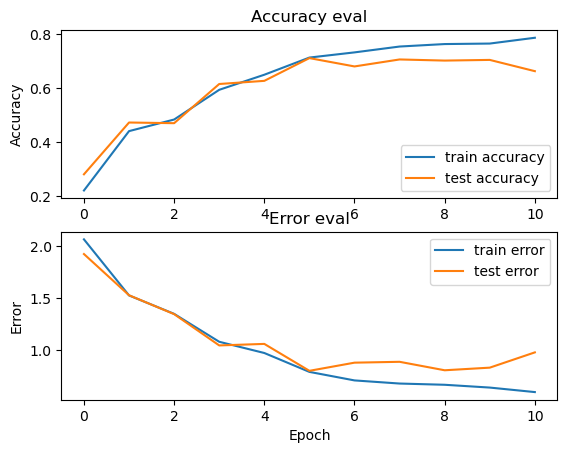

In [53]:
history1 = model1.fit(
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model1")
)

plot_history(history1)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.3979 - accuracy: 0.6116INFO:tensorflow:Assets written to: tmp/ckptmodel2/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel2/assets


151/151 [==============================] - 17s 109ms/step - loss: 2.3979 - accuracy: 0.6116 - val_loss: 2.3494 - val_accuracy: 0.5600
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 4.1148 - accuracy: 0.5133INFO:tensorflow:Assets written to: tmp/ckptmodel2/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel2/assets


151/151 [==============================] - 17s 111ms/step - loss: 4.1148 - accuracy: 0.5133 - val_loss: 2.0740 - val_accuracy: 0.6308
Epoch 3/100
151/151 [==============================] - 16s 106ms/step - loss: 1.9931 - accuracy: 0.6512 - val_loss: 2.3152 - val_accuracy: 0.6133
Epoch 4/100
151/151 [==============================] - 16s 105ms/step - loss: 3.0976 - accuracy: 0.6056 - val_loss: 4.3760 - val_accuracy: 0.5467
Epoch 5/100
151/151 [==============================] - 16s 105ms/step - loss: 4.6602 - accuracy: 0.5883 - val_loss: 2.7795 - val_accuracy: 0.6192
Epoch 6/100
151/151 [==============================] - 16s 105ms/step - loss: 3.7795 - accuracy: 0.6385 - val_loss: 6.9644 - val_accuracy: 0.5100
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 9.0052 - accuracy: 0.5317INFO:tensorflow:Assets written to: tmp/ckptmodel2/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel2/assets


151/151 [==============================] - 16s 106ms/step - loss: 9.0052 - accuracy: 0.5317 - val_loss: 4.7952 - val_accuracy: 0.6392


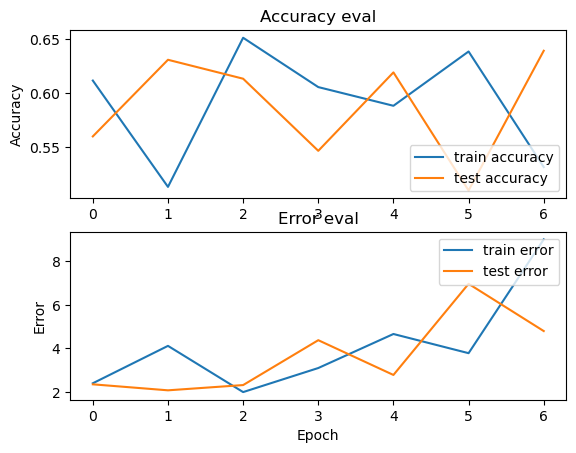

In [55]:
history2 = model2.fit(
    train_generator,
    epochs=100 ,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model2")
)
plot_history(history2)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.3127 - accuracy: 0.1168INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 21s 125ms/step - loss: 2.3127 - accuracy: 0.1168 - val_loss: 2.2885 - val_accuracy: 0.1200
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 2.2497 - accuracy: 0.1485INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 17s 109ms/step - loss: 2.2497 - accuracy: 0.1485 - val_loss: 2.2814 - val_accuracy: 0.1217
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 2.2311 - accuracy: 0.1560INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 16s 109ms/step - loss: 2.2311 - accuracy: 0.1560 - val_loss: 2.2696 - val_accuracy: 0.1458
Epoch 4/100
151/151 [==============================] - 16s 107ms/step - loss: 2.2201 - accuracy: 0.1716 - val_loss: 2.2594 - val_accuracy: 0.1433
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 2.2177 - accuracy: 0.1818INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 16s 108ms/step - loss: 2.2177 - accuracy: 0.1818 - val_loss: 2.2414 - val_accuracy: 0.1650
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 2.1380 - accuracy: 0.2218INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 16s 107ms/step - loss: 2.1380 - accuracy: 0.2218 - val_loss: 2.1790 - val_accuracy: 0.2242
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 1.8494 - accuracy: 0.3417INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.8494 - accuracy: 0.3417 - val_loss: 1.5069 - val_accuracy: 0.4642
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 1.3873 - accuracy: 0.5154INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.3873 - accuracy: 0.5154 - val_loss: 1.3002 - val_accuracy: 0.5092
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 1.1242 - accuracy: 0.5973INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 17s 109ms/step - loss: 1.1242 - accuracy: 0.5973 - val_loss: 1.4747 - val_accuracy: 0.5383
Epoch 10/100
151/151 [==============================] - 16s 106ms/step - loss: 1.0764 - accuracy: 0.6362 - val_loss: 1.8826 - val_accuracy: 0.5317
Epoch 11/100
151/151 [==============================] - ETA: 0s - loss: 1.0367 - accuracy: 0.6776INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 17s 109ms/step - loss: 1.0367 - accuracy: 0.6776 - val_loss: 1.3477 - val_accuracy: 0.5792
Epoch 12/100
151/151 [==============================] - ETA: 0s - loss: 0.9923 - accuracy: 0.6947INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel3/assets


151/151 [==============================] - 18s 117ms/step - loss: 0.9923 - accuracy: 0.6947 - val_loss: 1.0804 - val_accuracy: 0.7225
Epoch 13/100
151/151 [==============================] - 17s 113ms/step - loss: 1.1513 - accuracy: 0.6930 - val_loss: 1.9156 - val_accuracy: 0.5833
Epoch 14/100
151/151 [==============================] - 17s 110ms/step - loss: 1.4581 - accuracy: 0.6916 - val_loss: 1.6465 - val_accuracy: 0.6933
Epoch 15/100
151/151 [==============================] - 17s 113ms/step - loss: 1.6980 - accuracy: 0.6766 - val_loss: 2.2767 - val_accuracy: 0.6167
Epoch 16/100
151/151 [==============================] - 17s 109ms/step - loss: 1.6529 - accuracy: 0.7078 - val_loss: 2.9279 - val_accuracy: 0.6183
Epoch 17/100
151/151 [==============================] - 16s 105ms/step - loss: 2.8311 - accuracy: 0.6714 - val_loss: 6.6112 - val_accuracy: 0.4842


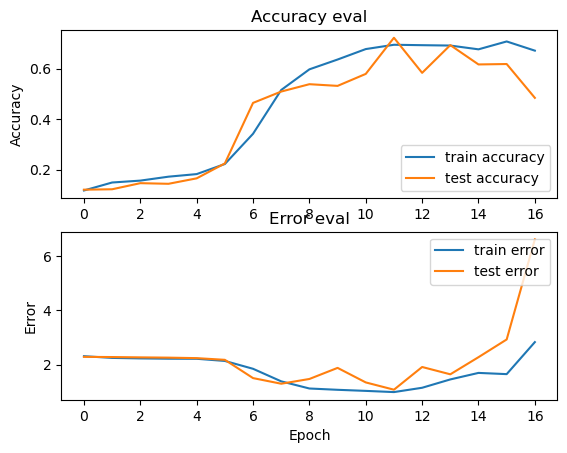

In [56]:

history3 = model3.fit(
    train_generator,
    epochs=100 ,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model3")
)
plot_history(history3)

### Starting with high number of kernels and reducing with deeper layers 


TBD: 

1. Start with a high number of kernels and reduce for deeper layers
Reasoning: This approach is often motivated by the idea that early layers in a CNN capture more generic, low-level features such as edges and textures, which are more numerous. Deeper layers, on the other hand, combine these features into higher-level, more abstract concepts, which can be represented with fewer, but more specific, kernels.

Studies and Examples:

Classic architectures like VGG and AlexNet tend to increase the number of filters as they progress through the network, but a variant of this approach would be to start very high and decrease, potentially allowing for a broad initial feature capture that is incrementally distilled.
This configuration might also help in reducing computational overhead in deeper layers where spatial dimensions are reduced (due to pooling layers).


In [57]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model5 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model6 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model7 = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 1.9865 - accuracy: 0.2761INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


151/151 [==============================] - 19s 110ms/step - loss: 1.9865 - accuracy: 0.2761 - val_loss: 1.6787 - val_accuracy: 0.3525
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.4408 - accuracy: 0.4736INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


151/151 [==============================] - 15s 96ms/step - loss: 1.4408 - accuracy: 0.4736 - val_loss: 1.4447 - val_accuracy: 0.4967
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.2071 - accuracy: 0.5623INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


151/151 [==============================] - 15s 96ms/step - loss: 1.2071 - accuracy: 0.5623 - val_loss: 1.3611 - val_accuracy: 0.5400
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.0515 - accuracy: 0.6249INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel4/assets


151/151 [==============================] - 15s 96ms/step - loss: 1.0515 - accuracy: 0.6249 - val_loss: 1.1855 - val_accuracy: 0.6017
Epoch 5/100
151/151 [==============================] - 14s 93ms/step - loss: 1.2750 - accuracy: 0.5583 - val_loss: 1.4971 - val_accuracy: 0.4317
Epoch 6/100
151/151 [==============================] - 15s 100ms/step - loss: 1.1897 - accuracy: 0.5652 - val_loss: 1.2185 - val_accuracy: 0.5717
Epoch 7/100
151/151 [==============================] - 15s 102ms/step - loss: 1.1380 - accuracy: 0.6274 - val_loss: 1.4911 - val_accuracy: 0.5775
Epoch 8/100
151/151 [==============================] - 15s 100ms/step - loss: 1.2182 - accuracy: 0.6268 - val_loss: 1.4575 - val_accuracy: 0.5733
Epoch 9/100
151/151 [==============================] - 15s 99ms/step - loss: 1.3862 - accuracy: 0.6220 - val_loss: 1.4127 - val_accuracy: 0.5933


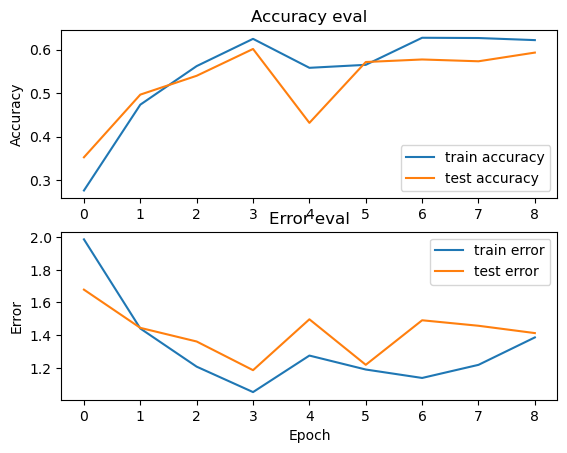

In [58]:
history4 = model4.fit(
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model4")
)

plot_history(history4)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.1348 - accuracy: 0.1922INFO:tensorflow:Assets written to: tmp/ckptmodel5/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel5/assets


151/151 [==============================] - 21s 123ms/step - loss: 2.1348 - accuracy: 0.1922 - val_loss: 2.1361 - val_accuracy: 0.1683
Epoch 2/100
151/151 [==============================] - 16s 104ms/step - loss: 1.8859 - accuracy: 0.3090 - val_loss: 2.3215 - val_accuracy: 0.1508
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.5407 - accuracy: 0.4336INFO:tensorflow:Assets written to: tmp/ckptmodel5/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel5/assets


151/151 [==============================] - 16s 106ms/step - loss: 1.5407 - accuracy: 0.4336 - val_loss: 1.6905 - val_accuracy: 0.3458
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.2697 - accuracy: 0.5375INFO:tensorflow:Assets written to: tmp/ckptmodel5/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel5/assets


151/151 [==============================] - 16s 106ms/step - loss: 1.2697 - accuracy: 0.5375 - val_loss: 1.1389 - val_accuracy: 0.5717
Epoch 5/100
151/151 [==============================] - 16s 103ms/step - loss: 1.1594 - accuracy: 0.5991 - val_loss: 1.3176 - val_accuracy: 0.4858
Epoch 6/100
151/151 [==============================] - 16s 102ms/step - loss: 1.3449 - accuracy: 0.5854 - val_loss: 1.4977 - val_accuracy: 0.5242
Epoch 7/100
151/151 [==============================] - 15s 101ms/step - loss: 1.8705 - accuracy: 0.5373 - val_loss: 3.9407 - val_accuracy: 0.1608
Epoch 8/100
151/151 [==============================] - 16s 105ms/step - loss: 1.9530 - accuracy: 0.3030 - val_loss: 1.8467 - val_accuracy: 0.3167
Epoch 9/100
151/151 [==============================] - 16s 104ms/step - loss: 2.0423 - accuracy: 0.3880 - val_loss: 2.6561 - val_accuracy: 0.2692


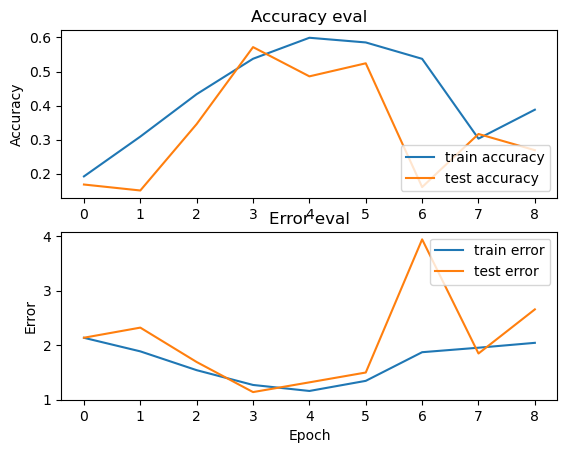

In [59]:
history5 = model5.fit(
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model5")
)

plot_history(history5)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.1062INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 21s 123ms/step - loss: 2.3036 - accuracy: 0.1062 - val_loss: 2.2756 - val_accuracy: 0.1467
Epoch 2/100
151/151 [==============================] - 16s 105ms/step - loss: 2.2639 - accuracy: 0.1510 - val_loss: 2.2670 - val_accuracy: 0.1108
Epoch 3/100
151/151 [==============================] - 16s 107ms/step - loss: 2.2288 - accuracy: 0.1649 - val_loss: 2.2878 - val_accuracy: 0.1233
Epoch 4/100
151/151 [==============================] - 16s 105ms/step - loss: 2.2172 - accuracy: 0.1722 - val_loss: 2.2722 - val_accuracy: 0.1283
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 2.1829 - accuracy: 0.1989INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 17s 109ms/step - loss: 2.1829 - accuracy: 0.1989 - val_loss: 2.2423 - val_accuracy: 0.1533
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 2.1927 - accuracy: 0.1989INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 17s 109ms/step - loss: 2.1927 - accuracy: 0.1989 - val_loss: 2.1954 - val_accuracy: 0.1717
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 2.1741 - accuracy: 0.2078INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 16s 108ms/step - loss: 2.1741 - accuracy: 0.2078 - val_loss: 2.2400 - val_accuracy: 0.1825
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 2.1438 - accuracy: 0.2264INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 16s 108ms/step - loss: 2.1438 - accuracy: 0.2264 - val_loss: 2.0221 - val_accuracy: 0.2475
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 1.8987 - accuracy: 0.3247INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.8987 - accuracy: 0.3247 - val_loss: 1.9198 - val_accuracy: 0.3000
Epoch 10/100
151/151 [==============================] - ETA: 0s - loss: 1.4159 - accuracy: 0.4898INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 16s 108ms/step - loss: 1.4159 - accuracy: 0.4898 - val_loss: 1.3437 - val_accuracy: 0.4883
Epoch 11/100
151/151 [==============================] - ETA: 0s - loss: 1.2145 - accuracy: 0.5600INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 16s 107ms/step - loss: 1.2145 - accuracy: 0.5600 - val_loss: 1.2360 - val_accuracy: 0.5433
Epoch 12/100
151/151 [==============================] - ETA: 0s - loss: 1.0902 - accuracy: 0.6299INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.0902 - accuracy: 0.6299 - val_loss: 1.2198 - val_accuracy: 0.6008
Epoch 13/100
151/151 [==============================] - ETA: 0s - loss: 1.1185 - accuracy: 0.6247INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 17s 110ms/step - loss: 1.1185 - accuracy: 0.6247 - val_loss: 1.1727 - val_accuracy: 0.6058
Epoch 14/100
151/151 [==============================] - ETA: 0s - loss: 1.1498 - accuracy: 0.6424INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 16s 109ms/step - loss: 1.1498 - accuracy: 0.6424 - val_loss: 1.1058 - val_accuracy: 0.6483
Epoch 15/100
151/151 [==============================] - 16s 107ms/step - loss: 1.1759 - accuracy: 0.6651 - val_loss: 2.7769 - val_accuracy: 0.3892
Epoch 16/100
151/151 [==============================] - 16s 108ms/step - loss: 1.3659 - accuracy: 0.6454 - val_loss: 2.7642 - val_accuracy: 0.5175
Epoch 17/100
151/151 [==============================] - ETA: 0s - loss: 1.4966 - accuracy: 0.6354INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel6/assets


151/151 [==============================] - 16s 108ms/step - loss: 1.4966 - accuracy: 0.6354 - val_loss: 1.6741 - val_accuracy: 0.6758
Epoch 18/100
151/151 [==============================] - 16s 108ms/step - loss: 1.3749 - accuracy: 0.6918 - val_loss: 1.8040 - val_accuracy: 0.6750
Epoch 19/100
151/151 [==============================] - 16s 105ms/step - loss: 1.5547 - accuracy: 0.6887 - val_loss: 1.9319 - val_accuracy: 0.6483


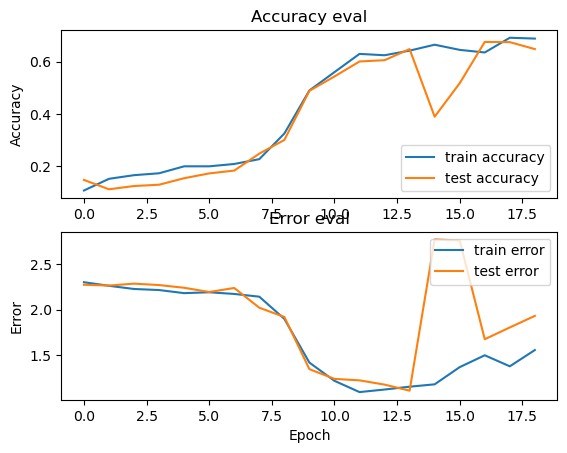

In [60]:
history6 = model6.fit(
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model6")
)

plot_history(history6)

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.1102 - accuracy: 0.2122INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 25s 150ms/step - loss: 2.1102 - accuracy: 0.2122 - val_loss: 1.9291 - val_accuracy: 0.2325
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.6783 - accuracy: 0.3836INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 21s 137ms/step - loss: 1.6783 - accuracy: 0.3836 - val_loss: 1.7422 - val_accuracy: 0.3725
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.3723 - accuracy: 0.4942INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 20s 134ms/step - loss: 1.3723 - accuracy: 0.4942 - val_loss: 1.3728 - val_accuracy: 0.5175
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.1027 - accuracy: 0.5893INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 20s 134ms/step - loss: 1.1027 - accuracy: 0.5893 - val_loss: 1.3377 - val_accuracy: 0.5467
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 1.0594 - accuracy: 0.6310INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 20s 134ms/step - loss: 1.0594 - accuracy: 0.6310 - val_loss: 1.3464 - val_accuracy: 0.5558
Epoch 6/100
151/151 [==============================] - 20s 132ms/step - loss: 0.9721 - accuracy: 0.6643 - val_loss: 1.7647 - val_accuracy: 0.5100
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 1.2245 - accuracy: 0.6133INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 20s 134ms/step - loss: 1.2245 - accuracy: 0.6133 - val_loss: 1.2267 - val_accuracy: 0.6050
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 1.1162 - accuracy: 0.6526INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


INFO:tensorflow:Assets written to: tmp/ckptmodel7/assets


151/151 [==============================] - 20s 133ms/step - loss: 1.1162 - accuracy: 0.6526 - val_loss: 1.3007 - val_accuracy: 0.6333
Epoch 9/100
151/151 [==============================] - 20s 132ms/step - loss: 1.1332 - accuracy: 0.6731 - val_loss: 1.8723 - val_accuracy: 0.5317
Epoch 10/100
151/151 [==============================] - 20s 131ms/step - loss: 1.3978 - accuracy: 0.6508 - val_loss: 1.2927 - val_accuracy: 0.5925
Epoch 11/100
151/151 [==============================] - 20s 132ms/step - loss: 1.3125 - accuracy: 0.6851 - val_loss: 1.7040 - val_accuracy: 0.6175
Epoch 12/100
151/151 [==============================] - 20s 132ms/step - loss: 2.5124 - accuracy: 0.5750 - val_loss: 3.6587 - val_accuracy: 0.4683


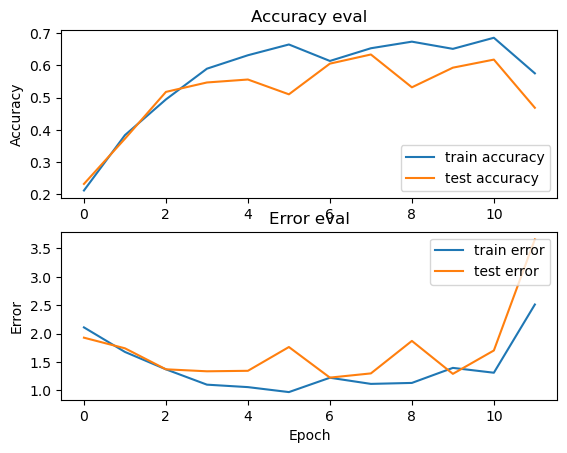

In [61]:
history7 = model7.fit(
    train_generator,
    epochs=100,
    batch_size = BATCH_SIZE, 
    validation_data=validation_generator,
    callbacks=create_callbacks("model7")
)

plot_history(history7)

In [67]:

# test_loss1, test_accuracy1 = model1.evaluate(test_generator, steps=len(test_generator))
# test_loss2, test_accuracy2 = model2.evaluate(test_generator, steps=len(test_generator))
# test_loss3, test_accuracy3 = model3.evaluate(test_generator, steps=len(test_generator))
# test_loss4, test_accuracy4 = model4.evaluate(test_generator, steps=len(test_generator))
# test_loss5, test_accuracy5 = model5.evaluate(test_generator, steps=len(test_generator))
# test_loss6, test_accuracy6 = model6.evaluate(test_generator, steps=len(test_generator))
# test_loss7, test_accuracy7 = model7.evaluate(test_generator, steps=len(test_generator))


# print(test_accuracy1)
# print(test_accuracy2)
# print(test_accuracy3)
# print(test_accuracy4)
# print(test_accuracy5)
# print(test_accuracy6)
# print(test_accuracy7)

model_paths = ['tmp/ckptmodel1', 'tmp/ckptmodel2', 'tmp/ckptmodel3', 'tmp/ckptmodel4', 'tmp/ckptmodel5', 'tmp/ckptmodel6', 'tmp/ckptmodel7']

for model_path in model_paths:

    model = load_model(model_path)
    
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    mod_no = model_path[-1]
    
    print(f"Model from {mod_no} - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

129/129 [==============================] - 8s 57ms/step - loss: 17.4485 - accuracy: 0.4320
Model from 1 - Loss: 17.4485, Accuracy: 0.4320
129/129 [==============================] - 8s 54ms/step - loss: 51.7239 - accuracy: 0.4412
Model from 2 - Loss: 51.7239, Accuracy: 0.4412
129/129 [==============================] - 8s 55ms/step - loss: 21.3080 - accuracy: 0.4173
Model from 3 - Loss: 21.3080, Accuracy: 0.4173
129/129 [==============================] - 8s 54ms/step - loss: 8.4347 - accuracy: 0.4080
Model from 4 - Loss: 8.4347, Accuracy: 0.4080
129/129 [==============================] - 8s 55ms/step - loss: 10.9393 - accuracy: 0.4144
Model from 5 - Loss: 10.9393, Accuracy: 0.4144
129/129 [==============================] - 8s 56ms/step - loss: 15.8785 - accuracy: 0.4537
Model from 6 - Loss: 15.8785, Accuracy: 0.4537
129/129 [==============================] - 9s 60ms/step - loss: 19.2247 - accuracy: 0.4473
Model from 7 - Loss: 19.2247, Accuracy: 0.4473


# Experiment 4: number of convolution layers

In [119]:
def create_callbacks(model_name,patience=5):
    logger = keras.callbacks.CSVLogger(f'tmp/no_conv_layers_expt/{model_name}.csv', append=True)
    model_callbacks = [
        keras.callbacks.EarlyStopping(patience=patience),
        keras.callbacks.ModelCheckpoint(filepath='tmp/no_conv_layers_expt/'+model_name, 
                                        save_best_only=True, 
                                        monitor='val_accuracy',
                                        mode='max')
    ]
    return model_callbacks
    


def get_model(n_layers, dropout=BEST_DROPOUT):

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
    model.add(MaxPooling2D(2, 2))
    
    for i in range(n_layers):
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [120]:
layers = range(0, 7, 2)
for i in layers:
    model = get_model(i)
    model.fit(
        train_generator,
        epochs=100,
        batch_size = BATCH_SIZE, 
        validation_data=validation_generator,
        callbacks=create_callbacks(f"model{i}")
    )
    

Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 13.3668 - accuracy: 0.1458INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 22s 132ms/step - loss: 13.3668 - accuracy: 0.1458 - val_loss: 2.1520 - val_accuracy: 0.2342
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 2.9118 - accuracy: 0.2426INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 116ms/step - loss: 2.9118 - accuracy: 0.2426 - val_loss: 2.0657 - val_accuracy: 0.2442
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 2.1415 - accuracy: 0.3161INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 120ms/step - loss: 2.1415 - accuracy: 0.3161 - val_loss: 1.8299 - val_accuracy: 0.3208
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.9955 - accuracy: 0.3569INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 117ms/step - loss: 1.9955 - accuracy: 0.3569 - val_loss: 1.8018 - val_accuracy: 0.3417
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 1.7577 - accuracy: 0.3880INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 115ms/step - loss: 1.7577 - accuracy: 0.3880 - val_loss: 1.7076 - val_accuracy: 0.3708
Epoch 6/100
151/151 [==============================] - 17s 111ms/step - loss: 1.6617 - accuracy: 0.4221 - val_loss: 1.7775 - val_accuracy: 0.3533
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 1.5200 - accuracy: 0.4481INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.5200 - accuracy: 0.4481 - val_loss: 1.7257 - val_accuracy: 0.4108
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 1.4498 - accuracy: 0.4863INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 117ms/step - loss: 1.4498 - accuracy: 0.4863 - val_loss: 1.5916 - val_accuracy: 0.4592
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 1.4252 - accuracy: 0.5010INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.4252 - accuracy: 0.5010 - val_loss: 1.5639 - val_accuracy: 0.4658
Epoch 10/100
151/151 [==============================] - ETA: 0s - loss: 1.3854 - accuracy: 0.5119INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.3854 - accuracy: 0.5119 - val_loss: 1.6084 - val_accuracy: 0.4950
Epoch 11/100
151/151 [==============================] - ETA: 0s - loss: 1.2645 - accuracy: 0.5477INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 17s 113ms/step - loss: 1.2645 - accuracy: 0.5477 - val_loss: 1.4218 - val_accuracy: 0.5217
Epoch 12/100
151/151 [==============================] - 16s 107ms/step - loss: 1.2588 - accuracy: 0.5616 - val_loss: 1.6172 - val_accuracy: 0.4800
Epoch 13/100
151/151 [==============================] - ETA: 0s - loss: 1.2514 - accuracy: 0.5629INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 116ms/step - loss: 1.2514 - accuracy: 0.5629 - val_loss: 1.3758 - val_accuracy: 0.5408
Epoch 14/100
151/151 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.5818INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 118ms/step - loss: 1.2030 - accuracy: 0.5818 - val_loss: 1.4724 - val_accuracy: 0.5483
Epoch 15/100
151/151 [==============================] - ETA: 0s - loss: 1.2501 - accuracy: 0.5627INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 17s 115ms/step - loss: 1.2501 - accuracy: 0.5627 - val_loss: 1.4914 - val_accuracy: 0.5508
Epoch 16/100
151/151 [==============================] - ETA: 0s - loss: 1.1371 - accuracy: 0.6037INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model0/assets


151/151 [==============================] - 18s 118ms/step - loss: 1.1371 - accuracy: 0.6037 - val_loss: 1.2071 - val_accuracy: 0.6058
Epoch 17/100
151/151 [==============================] - 17s 110ms/step - loss: 1.1889 - accuracy: 0.5860 - val_loss: 1.3470 - val_accuracy: 0.5767
Epoch 18/100
151/151 [==============================] - 16s 108ms/step - loss: 1.1255 - accuracy: 0.6112 - val_loss: 1.2333 - val_accuracy: 0.5842
Epoch 19/100
151/151 [==============================] - 16s 108ms/step - loss: 1.1636 - accuracy: 0.6037 - val_loss: 1.5279 - val_accuracy: 0.5475
Epoch 20/100
151/151 [==============================] - 16s 108ms/step - loss: 1.1452 - accuracy: 0.6081 - val_loss: 1.2982 - val_accuracy: 0.5342
Epoch 21/100
151/151 [==============================] - 16s 108ms/step - loss: 1.0736 - accuracy: 0.6214 - val_loss: 1.2913 - val_accuracy: 0.5908
Epoch 1/100
151/151 [==============================] - ETA: 0s - loss: 2.2713 - accuracy: 0.1491INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


151/151 [==============================] - 21s 121ms/step - loss: 2.2713 - accuracy: 0.1491 - val_loss: 2.0739 - val_accuracy: 0.2108
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.8314 - accuracy: 0.3186INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


151/151 [==============================] - 17s 109ms/step - loss: 1.8314 - accuracy: 0.3186 - val_loss: 1.8090 - val_accuracy: 0.3267
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.4840 - accuracy: 0.4475INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


151/151 [==============================] - 16s 105ms/step - loss: 1.4840 - accuracy: 0.4475 - val_loss: 1.4384 - val_accuracy: 0.4833
Epoch 4/100
151/151 [==============================] - 14s 94ms/step - loss: 1.2405 - accuracy: 0.5396 - val_loss: 1.7061 - val_accuracy: 0.4750
Epoch 5/100
151/151 [==============================] - 15s 98ms/step - loss: 1.0921 - accuracy: 0.6145 - val_loss: 1.7162 - val_accuracy: 0.4433
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 0.9748 - accuracy: 0.6514INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


151/151 [==============================] - 16s 104ms/step - loss: 0.9748 - accuracy: 0.6514 - val_loss: 1.0567 - val_accuracy: 0.6292
Epoch 7/100
151/151 [==============================] - 15s 100ms/step - loss: 0.8352 - accuracy: 0.6997 - val_loss: 1.3904 - val_accuracy: 0.4925
Epoch 8/100
151/151 [==============================] - ETA: 0s - loss: 0.9144 - accuracy: 0.6672INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model2/assets


151/151 [==============================] - 15s 97ms/step - loss: 0.9144 - accuracy: 0.6672 - val_loss: 0.8770 - val_accuracy: 0.7075
Epoch 9/100
151/151 [==============================] - 15s 100ms/step - loss: 0.7356 - accuracy: 0.7401 - val_loss: 0.9150 - val_accuracy: 0.6750
Epoch 10/100
151/151 [==============================] - 15s 101ms/step - loss: 0.7514 - accuracy: 0.7420 - val_loss: 1.2478 - val_accuracy: 0.6042
Epoch 11/100
151/151 [==============================] - 14s 95ms/step - loss: 0.8011 - accuracy: 0.7314 - val_loss: 0.9338 - val_accuracy: 0.6408
Epoch 12/100
151/151 [==============================] - 15s 100ms/step - loss: 0.7952 - accuracy: 0.7303 - val_loss: 0.8490 - val_accuracy: 0.6900
Epoch 13/100
151/151 [==============================] - 15s 101ms/step - loss: 0.7833 - accuracy: 0.7436 - val_loss: 0.8057 - val_accuracy: 0.7058
Epoch 14/100
151/151 [==============================] - 15s 102ms/step - loss: 0.8220 - accuracy: 0.7409 - val_loss: 0.9335 - val_accu

INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 22s 122ms/step - loss: 2.1427 - accuracy: 0.1772 - val_loss: 2.1546 - val_accuracy: 0.1408
Epoch 2/100
151/151 [==============================] - ETA: 0s - loss: 1.8933 - accuracy: 0.2826INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 16s 108ms/step - loss: 1.8933 - accuracy: 0.2826 - val_loss: 1.9992 - val_accuracy: 0.2308
Epoch 3/100
151/151 [==============================] - ETA: 0s - loss: 1.6075 - accuracy: 0.4086INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 16s 108ms/step - loss: 1.6075 - accuracy: 0.4086 - val_loss: 1.5162 - val_accuracy: 0.4108
Epoch 4/100
151/151 [==============================] - ETA: 0s - loss: 1.2644 - accuracy: 0.5271INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 16s 107ms/step - loss: 1.2644 - accuracy: 0.5271 - val_loss: 1.3251 - val_accuracy: 0.4975
Epoch 5/100
151/151 [==============================] - ETA: 0s - loss: 1.1393 - accuracy: 0.5735INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 15s 97ms/step - loss: 1.1393 - accuracy: 0.5735 - val_loss: 1.3036 - val_accuracy: 0.5325
Epoch 6/100
151/151 [==============================] - ETA: 0s - loss: 1.0199 - accuracy: 0.6327INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 16s 102ms/step - loss: 1.0199 - accuracy: 0.6327 - val_loss: 1.1139 - val_accuracy: 0.5900
Epoch 7/100
151/151 [==============================] - ETA: 0s - loss: 0.9384 - accuracy: 0.6691INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 16s 103ms/step - loss: 0.9384 - accuracy: 0.6691 - val_loss: 1.1407 - val_accuracy: 0.5950
Epoch 8/100
151/151 [==============================] - 15s 101ms/step - loss: 1.0242 - accuracy: 0.6566 - val_loss: 2.3467 - val_accuracy: 0.5225
Epoch 9/100
151/151 [==============================] - ETA: 0s - loss: 0.9417 - accuracy: 0.6837INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


INFO:tensorflow:Assets written to: tmp/no_conv_layers_expt/model4/assets


151/151 [==============================] - 15s 96ms/step - loss: 0.9417 - accuracy: 0.6837 - val_loss: 1.1603 - val_accuracy: 0.5958
Epoch 10/100
151/151 [==============================] - 14s 92ms/step - loss: 0.9470 - accuracy: 0.6872 - val_loss: 1.5638 - val_accuracy: 0.5942
Epoch 11/100
151/151 [==============================] - 14s 94ms/step - loss: 0.9338 - accuracy: 0.7085 - val_loss: 1.4740 - val_accuracy: 0.5500


ValueError: Exception encountered when calling layer "max_pooling2d_140" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_140/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,32].

Call arguments received by layer "max_pooling2d_140" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 32), dtype=float32)

In [ ]:
for i in 

# Rough

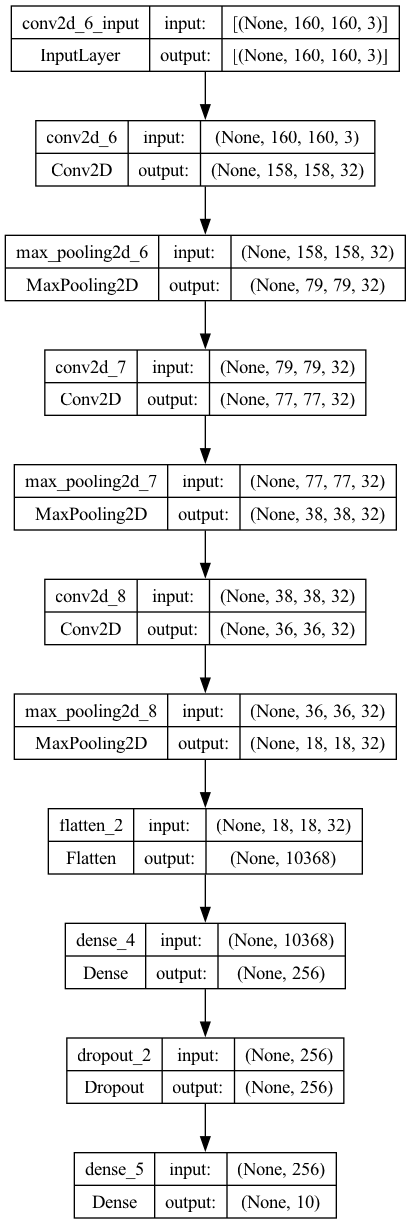

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model, to_file='/Users/nibin/Downloads/epoch_expt_1.png', show_shapes=True, show_layer_names=True)